### AI Lab -  Assignment 3 - CH22M503

#### Author - Aloy Banerjee
###### Roll No. CH22M503

### Question:
##### Please use the dataset provided for the previous assignment. You have to work only with the file with
##### your roll number specified on it. Each dataset has 6 features x1, x2, ..., x6 and 3 targets y1, y2, y3.
###### Q1 For the given dataset, implement a Ridge Regression model 
###### Q2 Use Lasso Regression to fit the given dataset 
###### Q3 Report on the effect of the regularization term (α) on the value of coefficients and performance of the models 
###### Q4 Compare both models and elaborate on your findings 

#### Reference used 

In [95]:
#https://machinelearningcompass.com/machine_learning_models/ridge_regression/
#https://machinelearningcompass.com/machine_learning_models/lasso_regression/

#### Importing Library

In [96]:
#Import library 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import Ridge,Lasso

sns.set(context="notebook", palette="Spectral", style="darkgrid", font_scale=1.0, color_codes=True,rc={'figure.figsize':(14,10)})

#### Common variable declaration

In [97]:
workingDir = 'E:\\Document\\M-Tech\\M-Tech Class\\2nd Trimester\\Assignment\\AI Lab\\Assignment 3\\Datasets'
dataset_fileName = 'ch22m503.csv'
alpha_iter = [10,1,0,0.01,0.001,0.00001]
df_analyzer = []

#### Common function

In [98]:
def standardize(input_data):
    sc=StandardScaler()
    return sc.fit_transform(input_data)

def analyze_performance(alpha, X, Y, typeofData):
    sc = StandardScaler()
    display(f'====================alpha value : {alpha}======================')
    #Ridge Regression
    ridge_regression= Ridge(alpha = alpha,fit_intercept=True,random_state = 42,max_iter= 150)
    ridge_model = Pipeline([('standardize', sc),('RidgeRegression', ridge_regression)])
    ridge_model.fit(X, Y)
    print('Ridge Intercept', ridge_model[1].intercept_, sep=':')
    print('Ridge Coefficient', ridge_model[1].coef_, sep=':')
    r_output_predicted_train = ridge_model.predict(X)
    RMSE_ridge = np.sqrt(mean_squared_error(Y,r_output_predicted_train))
    RSquared_ridge = r2_score(Y,r_output_predicted_train)
    
    RMSE_ridge_Y1 = np.sqrt(mean_squared_error(Y.iloc[:,0],ridge_model.predict(X)[:,0]))
    RSquared_ridge_Y1 = r2_score(Y.iloc[:,0],ridge_model.predict(X)[:,0])
    RMSE_ridge_Y2 = np.sqrt(mean_squared_error(Y.iloc[:,1],ridge_model.predict(X)[:,1]))
    RSquared_ridge_Y2 = r2_score(Y.iloc[:,0],ridge_model.predict(X)[:,1])
    RMSE_ridge_Y3 = np.sqrt(mean_squared_error(Y.iloc[:,2],ridge_model.predict(X)[:,2]))
    RSquared_ridge_Y3 = r2_score(Y.iloc[:,0],ridge_model.predict(X)[:,2])
    
    
    print(f'Ridge - RMSE : {RMSE_ridge}')
    print(f'Ridge - RSquared : {RSquared_ridge}')
    fig, ax = plt.subplots()
    sns.barplot(x=[1,2,3,4,5,6], y = ridge_model[1].coef_[0], color='cornflowerblue')
    sns.barplot(x=[1,2,3,4,5,6], y = ridge_model[1].coef_[1], color='pink')
    sns.barplot(x=[1,2,3,4,5,6], y = ridge_model[1].coef_[2], color='orange')
    ax.set_title('Values of the coefficients - Ridge', size=15)
    plt.show()
      
    df_intermediate_ridge = {'Alpha':alpha,'Type of Regression':'Ridge','TypeofData':typeofData,
                             'RMSE':RMSE_ridge,
                             'RMSE_Y1':RMSE_ridge_Y1,
                             'RMSE_Y2':RMSE_ridge_Y2,
                             'RMSE_Y3':RMSE_ridge_Y3,
                             'RSquared':RSquared_ridge,
                             'RSquared_Y1':RSquared_ridge_Y1,
                             'RSquared_Y2':RSquared_ridge_Y2,
                             'RSquared_Y3':RSquared_ridge_Y3,                                
                             'Coefficient_Y1':ridge_model[1].coef_[0],
                             'Coefficient_Y1_X1':ridge_model[1].coef_[0][0],
                             'Coefficient_Y1_X2':ridge_model[1].coef_[0][1],
                             'Coefficient_Y1_X3':ridge_model[1].coef_[0][2],
                             'Coefficient_Y1_X4':ridge_model[1].coef_[0][3],
                             'Coefficient_Y1_X5':ridge_model[1].coef_[0][4],
                             'Coefficient_Y1_X6':ridge_model[1].coef_[0][5], 
                             'Coefficient_Y2':ridge_model[1].coef_[1],
                             'Coefficient_Y2_X1':ridge_model[1].coef_[1][0],
                             'Coefficient_Y2_X2':ridge_model[1].coef_[1][1],
                             'Coefficient_Y2_X3':ridge_model[1].coef_[1][2],
                             'Coefficient_Y2_X4':ridge_model[1].coef_[1][3],
                             'Coefficient_Y2_X5':ridge_model[1].coef_[1][4],
                             'Coefficient_Y2_X6':ridge_model[1].coef_[1][5],                             
                             'Coefficient_Y3':ridge_model[1].coef_[2],
                             'Coefficient_Y3_X1':ridge_model[1].coef_[2][0],
                             'Coefficient_Y3_X2':ridge_model[1].coef_[2][1],
                             'Coefficient_Y3_X3':ridge_model[1].coef_[2][2],
                             'Coefficient_Y3_X4':ridge_model[1].coef_[2][3],
                             'Coefficient_Y3_X5':ridge_model[1].coef_[2][4],
                             'Coefficient_Y3_X6':ridge_model[1].coef_[2][5],
                            }
    
        
    df_analyzer.append(df_intermediate_ridge)
    
    #Lasso Regression
    sc = StandardScaler()
    lasso_regression = Lasso(alpha = alpha,fit_intercept=True,random_state = 42,max_iter= 150)
    lasso_model = Pipeline([('standardize', sc),('LassoRegression', lasso_regression)])
    lasso_model.fit(X, Y)
    print('Lasso Intercept', lasso_model[1].intercept_, sep=':')
    print('Lasso Coefficient', lasso_model[1].coef_, sep=':')
    l_output_predicted_train = lasso_model.predict(X)
    RMSE_lasso = np.sqrt(mean_squared_error(Y,l_output_predicted_train))
    RSquared_lasso = r2_score(Y,l_output_predicted_train)
    print(f'Lasso - RMSE : {RMSE_lasso}')
    print(f'Lasso - RSquared : {RSquared_lasso}')
    
    RMSE_lasso_Y1 = np.sqrt(mean_squared_error(Y.iloc[:,0],lasso_model.predict(X)[:,0]))
    RSquared_lasso_Y1 = r2_score(Y.iloc[:,0],lasso_model.predict(X)[:,0])
    RMSE_lasso_Y2 = np.sqrt(mean_squared_error(Y.iloc[:,1],lasso_model.predict(X)[:,1]))
    RSquared_lasso_Y2 = r2_score(Y.iloc[:,0],lasso_model.predict(X)[:,1])
    RMSE_lasso_Y3 = np.sqrt(mean_squared_error(Y.iloc[:,2],lasso_model.predict(X)[:,2]))
    RSquared_lasso_Y3 = r2_score(Y.iloc[:,0],lasso_model.predict(X)[:,2])
    
    
    fig, ax = plt.subplots()
    sns.barplot(x=[1,2,3,4,5,6], y = lasso_model[1].coef_[0], color='cornflowerblue')
    sns.barplot(x=[1,2,3,4,5,6], y = lasso_model[1].coef_[1], color='pink')
    sns.barplot(x=[1,2,3,4,5,6], y = lasso_model[1].coef_[2], color='orange')
    ax.set_title('Values of the coefficients - Lasso', size=15)  
    plt.show()
    
      
    df_intermediate_lasso = {'Alpha':alpha,'Type of Regression':'Lasso','TypeofData':typeofData,
                             'RMSE':RMSE_lasso,
                             'RMSE_Y1':RMSE_lasso_Y1,
                             'RMSE_Y2':RMSE_lasso_Y2,
                             'RMSE_Y3':RMSE_lasso_Y3,
                             'RSquared':RSquared_lasso,
                             'RSquared_Y1':RSquared_lasso_Y1,
                             'RSquared_Y2':RSquared_lasso_Y2,
                             'RSquared_Y3':RSquared_lasso_Y3,  
                             'Coefficient_Y1':lasso_model[1].coef_[0],
                             'Coefficient_Y1_X1':lasso_model[1].coef_[0][0],
                             'Coefficient_Y1_X2':lasso_model[1].coef_[0][1],
                             'Coefficient_Y1_X3':lasso_model[1].coef_[0][2],
                             'Coefficient_Y1_X4':lasso_model[1].coef_[0][3],
                             'Coefficient_Y1_X5':lasso_model[1].coef_[0][4],
                             'Coefficient_Y1_X6':lasso_model[1].coef_[0][5], 
                             'Coefficient_Y2':lasso_model[1].coef_[1],
                             'Coefficient_Y2_X1':lasso_model[1].coef_[1][0],
                             'Coefficient_Y2_X2':lasso_model[1].coef_[1][1],
                             'Coefficient_Y2_X3':lasso_model[1].coef_[1][2],
                             'Coefficient_Y2_X4':lasso_model[1].coef_[1][3],
                             'Coefficient_Y2_X5':lasso_model[1].coef_[1][4],
                             'Coefficient_Y2_X6':lasso_model[1].coef_[1][5],  
                             'Coefficient_Y3':lasso_model[1].coef_[2],
                             'Coefficient_Y3_X1':lasso_model[1].coef_[2][0],
                             'Coefficient_Y3_X2':lasso_model[1].coef_[2][1],
                             'Coefficient_Y3_X3':lasso_model[1].coef_[2][2],
                             'Coefficient_Y3_X4':lasso_model[1].coef_[2][3],
                             'Coefficient_Y3_X5':lasso_model[1].coef_[2][4],
                             'Coefficient_Y3_X6':lasso_model[1].coef_[2][5]
                            }
    df_analyzer.append(df_intermediate_lasso)
    
def plotWeights(input_cord,output_cord,data=0):
    if(data == 0):
        data = ridge_analyze
        Regression = 'Ridge Regression'
    elif(data ==1):
        data = lasso_analyze
        Regression = 'Lasso Regression'        
    fig,ax1 = plt.subplots(1,1,figsize=(12,5))
    sns.lineplot(x = 'Alpha', y = f'Coefficient_{output_cord}_{input_cord}',hue='TypeofData', palette = 'winter', data = data)        
    sns.despine(fig)
    fig.suptitle(f'{Regression} - Effects of alpha on weights')
    plt.show()

##### Loading Dataset

In [99]:
#Change the working directory 
os.chdir(workingDir)
#Load the data
dataset = pd.read_csv(dataset_fileName)

##### Display info of dataset

In [100]:
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y1      300 non-null    float64
 1   y2      300 non-null    float64
 2   y3      300 non-null    float64
 3   x1      300 non-null    float64
 4   x2      300 non-null    float64
 5   x3      300 non-null    float64
 6   x4      300 non-null    float64
 7   x5      300 non-null    float64
 8   x6      300 non-null    float64
dtypes: float64(9)
memory usage: 21.2 KB


None

##### Display statistical information of each column of dataset 

In [101]:
display(dataset.describe())

,y1,y2,y3,x1,x2,x3,x4,x5,x6
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1.971704,1.894681,1.938561,-0.000556,0.001934,-0.000120,0.004810,0.000395,-0.002939
std,6.712703,4.496053,3.968322,0.047096,0.050554,0.050415,0.041201,0.035499,0.031131
min,-18.071698,-13.808136,-9.571848,-0.143030,-0.147243,-0.184994,-0.103076,-0.090455,-0.096776
25%,-2.169525,-1.299587,-0.494731,-0.030571,-0.034597,-0.038382,-0.026517,-0.026435,-0.022263
50%,1.607958,1.912733,1.621601,-0.001074,0.003144,0.003498,0.005663,0.001777,-0.001468
75%,6.334674,5.076724,4.417613,0.033125,0.040575,0.035981,0.030797,0.023777,0.018341
max,23.005748,13.527036,14.078908,0.160984,0.144788,0.122464,0.135587,0.085364,0.091987


##### Display the given dataset 

In [102]:
display(dataset)

,y1,y2,y3,x1,x2,x3,x4,x5,x6
0,4.032059,4.380135,2.466634,0.000837,0.001992,0.031592,-0.033059,-0.004093,0.001486
1,3.940345,4.276451,2.457723,-0.002535,0.004551,0.029849,0.025805,0.030363,-0.017328
2,13.427120,11.876140,6.802207,0.023598,0.042402,0.107008,-0.020884,0.022644,-0.020999
3,-0.595405,-0.400295,0.783955,0.011311,-0.020204,-0.022805,0.052265,-0.030691,0.015796
4,-0.660072,0.637356,0.515951,-0.049540,0.013128,-0.011487,-0.024079,0.037111,-0.025304
...,...,...,...,...,...,...,...,...,...
295,-6.480876,-4.391700,-2.152671,-0.030116,-0.033487,-0.060712,0.003858,-0.025873,0.035290
296,-1.752936,0.068624,-0.471807,0.006568,-0.042976,-0.006432,0.014582,-0.054451,-0.005245
297,3.862183,6.299373,1.507590,-0.035834,0.001830,0.063450,-0.009888,0.015747,-0.091078
298,2.071755,0.373426,3.238364,-0.074970,0.084574,-0.039531,-0.055545,-0.009055,-0.033014


##### Checking for null or na values in data set 

In [103]:
dataset.isnull().isna().values.any()

False

In [104]:
Q1_input_x_all = dataset[['x1','x2','x3','x4','x5','x6']]
Q1_output_y_all = dataset[['y1','y2','y3']] 

##### Train and test split for data set 

In [105]:
X_train, X_test, Y_train, Y_test= train_test_split(Q1_input_x_all, Q1_output_y_all, test_size=0.2, random_state=42)

In [106]:
display(X_train.shape)
display(X_test.shape)
display(Y_train.shape)
display(Y_test.shape)

(240, 6)

(60, 6)

(240, 3)

(60, 3)

###### Q1 For the given dataset, implement a Ridge Regression model 

In [107]:
#Creating pipeline for Ridge Regression 
sc = StandardScaler()
alpha = 0.005
ridge_regression= Ridge(alpha = alpha,fit_intercept=True,random_state = 42,max_iter= 150)
ridge_model = Pipeline([('standardize', sc),('RidgeRegression', ridge_regression)])
#Fit the model in training data 
ridge_model.fit(X_train, Y_train)
print('Ridge Intercept', ridge_model[1].intercept_, sep=':')
print('Ridge Coefficient', ridge_model[1].coef_, sep=':')

Ridge Intercept:[2.11635531 1.96561687 2.0244219 ]
Ridge Coefficient:[[ 2.78410674e+00  4.20118418e+00  3.27892798e+00 -9.27486975e-06
   3.48506106e-05  2.10679191e-05]
 [ 7.15194486e-01  1.61736535e+00  4.09016988e+00 -1.86200831e-05
   1.18285698e-05 -5.43618358e-06]
 [ 1.85096180e+00  2.90706436e+00  7.81767200e-01 -4.29069476e-07
   2.57581119e-05  2.00890374e-05]]


##### Ridge regression performance measure

In [108]:
r_output_predicted_train = ridge_model.predict(X_train)
print(f'Ridge - RMSE (Training Set) : {np.sqrt(mean_squared_error(Y_train,r_output_predicted_train))}')
print(f'Ridge - RSquared (Training Set) : {r2_score(Y_train,r_output_predicted_train)}')

r_output_predicted_test = ridge_model.predict(X_test)
print(f'Ridge - RMSE (Test Set) : {np.sqrt(mean_squared_error(Y_test,r_output_predicted_test))}')
print(f'Ridge - RSquared (Test Set) : {r2_score(Y_test,r_output_predicted_test)}')


Ridge - RMSE (Training Set) : 9.983274436658125e-05
Ridge - RSquared (Training Set) : 0.9999999996203791
Ridge - RMSE (Test Set) : 0.00010110335365165753
Ridge - RSquared (Test Set) : 0.9999999995976259


#### Both the training and test set are performing well with approx 99% accuracy, after fitting the ridge regression

###### Q2 Use Lasso Regression to fit the given dataset 

In [109]:
#Creating pipeline for Ridge Regression 
alpha = 0.005
sc = StandardScaler()
lasso_regression = Lasso(alpha = alpha,fit_intercept=True,random_state = 42,max_iter= 150)
lasso_model = Pipeline([('standardize', sc),('LassoRegression', lasso_regression)])
#Fit the model in training data 
lasso_model.fit(X_train, Y_train)
print('Lasso Intercept', lasso_model[1].intercept_, sep=':')
print('Lasso Coefficient', lasso_model[1].coef_, sep=':')

Lasso Intercept:[2.11635531 1.96561687 2.0244219 ]
Lasso Coefficient:[[ 2.78151214  4.19655012  3.27437547 -0.          0.          0.        ]
 [ 0.71254178  1.61268189  4.08565115 -0.          0.          0.        ]
 [ 1.84832197  2.9024113   0.7771739  -0.          0.          0.        ]]


##### Lasso regression performance measure

In [110]:
l_output_predicted_train = lasso_model.predict(X_train)
print(f'Lasso - RMSE (Training Set) : {np.sqrt(mean_squared_error(Y_train,l_output_predicted_train))}')
print(f'Lasso - RSquared (Training Set) : {r2_score(Y_train,l_output_predicted_train)}')

l_output_predicted_test = lasso_model.predict(X_test)
print(f'Lasso - RMSE (Test Set) : {np.sqrt(mean_squared_error(Y_test,l_output_predicted_test))}')
print(f'Lasso - RSquared (Test Set) : {r2_score(Y_test,l_output_predicted_test)}')

Lasso - RMSE (Training Set) : 0.007733936960135869
Lasso - RSquared (Training Set) : 0.9999973079147111
Lasso - RMSE (Test Set) : 0.007811895885243732
Lasso - RSquared (Test Set) : 0.9999971081571383


#### Both the training and test set are performing well with approx 99% accuracy, after fitting the ridge regression.

###### Q3 Report on the effect of the regularization term (α) on the value of coefficients and performance of the models 

## Ridge & Lasso common

#### Performance measure for different alpha values on training set 

'====================alpha value : 10======================'

Ridge Intercept:[2.11635531 1.96561687 2.0244219 ]
Ridge Coefficient:[[ 2.75010080e+00  3.99958107e+00  3.14980136e+00 -1.63763148e-02
   6.21702158e-02  3.88161532e-02]
 [ 7.65429407e-01  1.51888151e+00  3.90576595e+00 -3.25976827e-02
   2.06767664e-02 -8.97658578e-03]
 [ 1.80785234e+00  2.77482023e+00  7.59088889e-01 -9.02970835e-04
   4.61571177e-02  3.65487581e-02]]
Ridge - RMSE : 0.18969048990338863
Ridge - RSquared : 0.9986316970802083


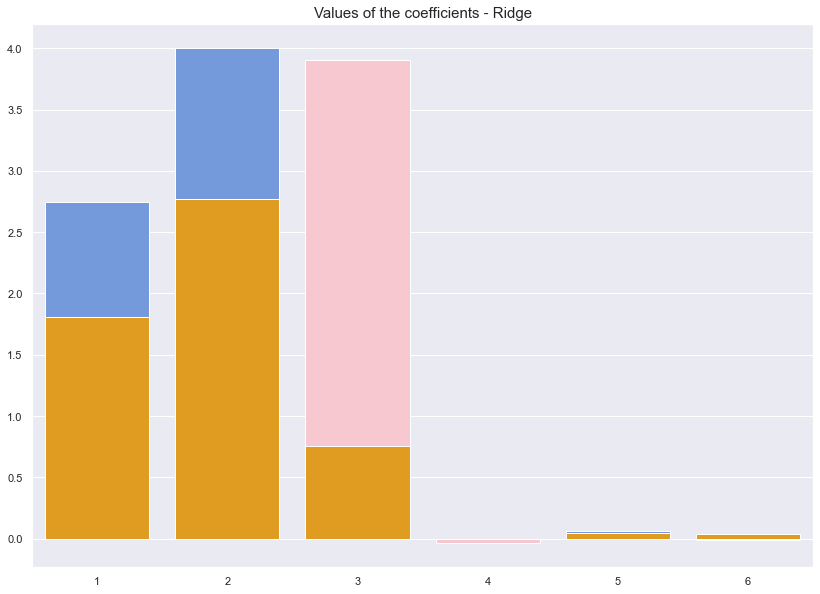

Lasso Intercept:[2.11635531 1.96561687 2.0244219 ]
Lasso Coefficient:[[ 0.  0.  0. -0.  0.  0.]
 [ 0.  0.  0. -0.  0.  0.]
 [ 0.  0.  0. -0.  0.  0.]]
Lasso - RMSE : 5.193783923814553
Lasso - RSquared : 3.700743415417188e-17


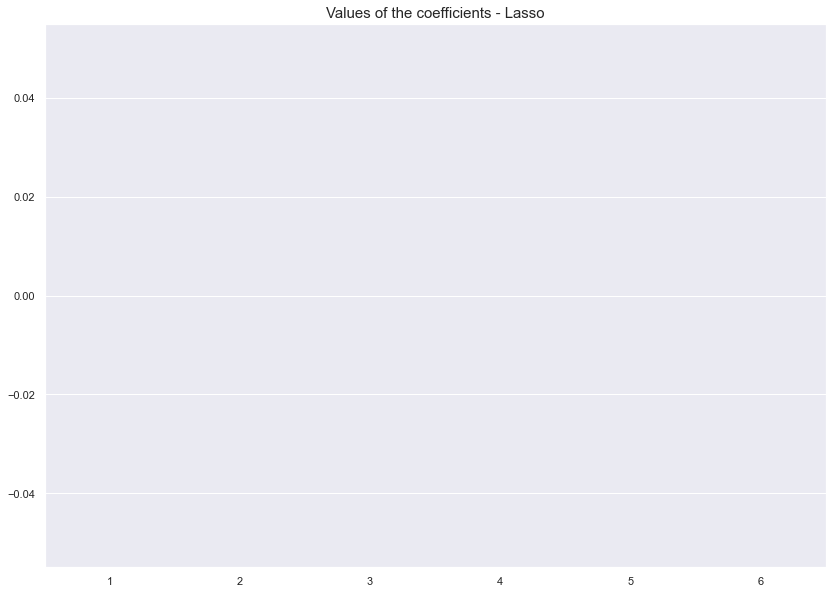

'====================alpha value : 1======================'

Ridge Intercept:[2.11635531 1.96561687 2.0244219 ]
Ridge Coefficient:[[ 2.78105373e+00  4.17990987e+00  3.26548237e+00 -1.83116859e-03
   6.88872236e-03  4.17858514e-03]
 [ 7.20938543e-01  1.60683280e+00  4.07085579e+00 -3.67330271e-03
   2.33312679e-03 -1.06625310e-03]
 [ 1.84666508e+00  2.89316159e+00  7.79437948e-01 -8.62663752e-05
   5.09387330e-03  3.97910686e-03]]
Ridge - RMSE : 0.019860646604688954
Ridge - RSquared : 0.9999849783955135


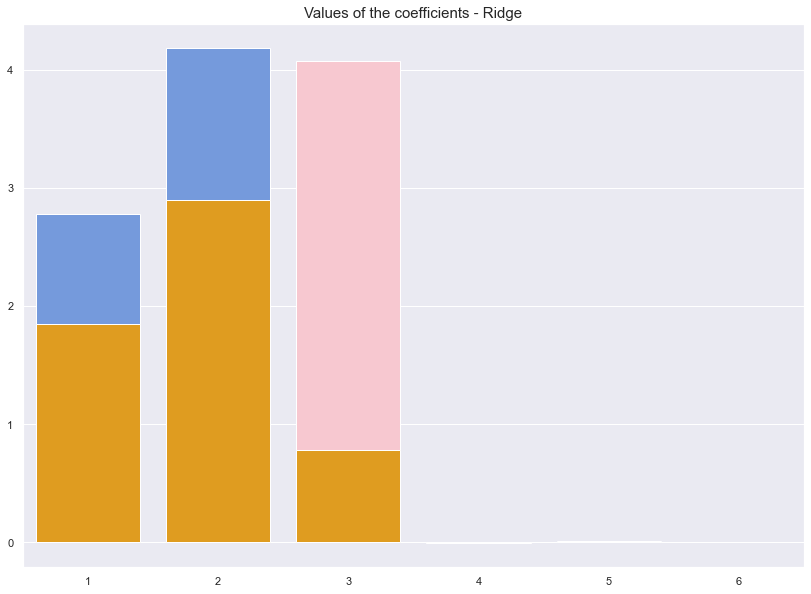

Lasso Intercept:[2.11635531 1.96561687 2.0244219 ]
Lasso Coefficient:[[ 2.24798134  3.25798624  2.35913432 -0.          0.          0.        ]
 [ 0.17902064  0.67411457  3.17040712 -0.          0.          0.        ]
 [ 1.2728534   1.98298137  0.         -0.          0.          0.        ]]
Lasso - RMSE : 1.525856024099488
Lasso - RSquared : 0.8966788253695834


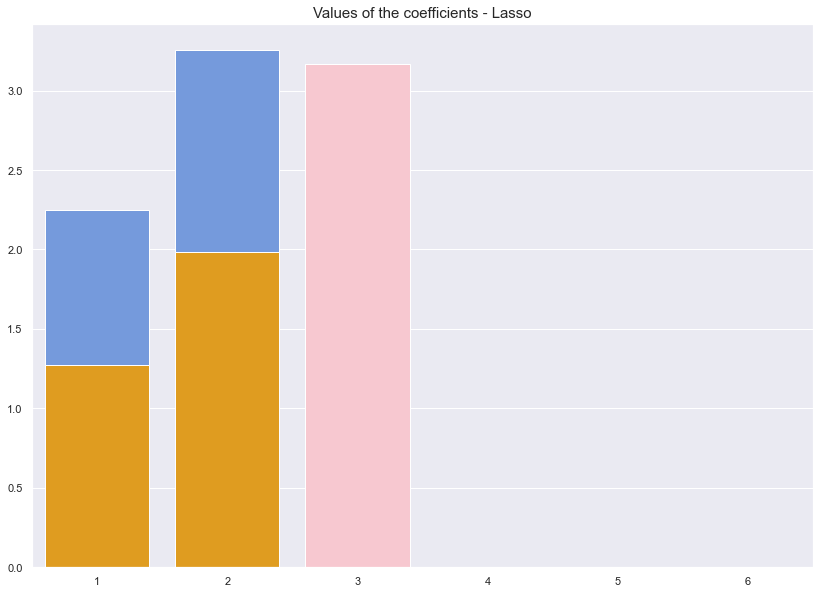

'====================alpha value : 0======================'

Ridge Intercept:[2.11635531 1.96561687 2.0244219 ]
Ridge Coefficient:[[ 2.78412187e+00  4.20129181e+00  3.27899589e+00 -4.92108586e-16
  -1.67616475e-15 -2.86024894e-15]
 [ 7.15165162e-01  1.61741872e+00  4.09026750e+00 -3.33971629e-16
  -3.08674279e-16 -8.99122441e-16]
 [ 1.85098338e+00  2.90713467e+00  7.81778947e-01 -4.12670963e-16
  -1.22513850e-15 -1.97047983e-15]]
Ridge - RMSE : 4.49353809531638e-15
Ridge - RSquared : 1.0


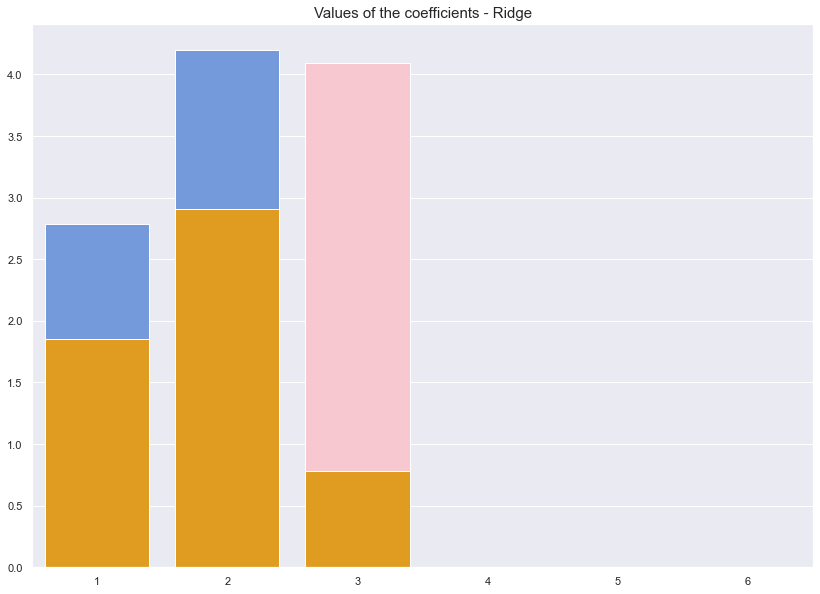

Lasso Intercept:[2.11635531 1.96561687 2.0244219 ]
Lasso Coefficient:[[ 2.78431060e+00  4.20119440e+00  3.27892534e+00 -5.64352921e-05
   2.92042115e-05 -3.39233903e-05]
 [ 7.15325835e-01  1.61733543e+00  4.09020762e+00 -4.78174897e-05
   2.51081600e-05 -2.87335214e-05]
 [ 1.85106770e+00  2.90709135e+00  7.81747338e-01 -2.53302060e-05
   1.29167494e-05 -1.52311422e-05]]
Lasso - RMSE : 0.00013442750866350114
Lasso - RSquared : 0.9999999993437861


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


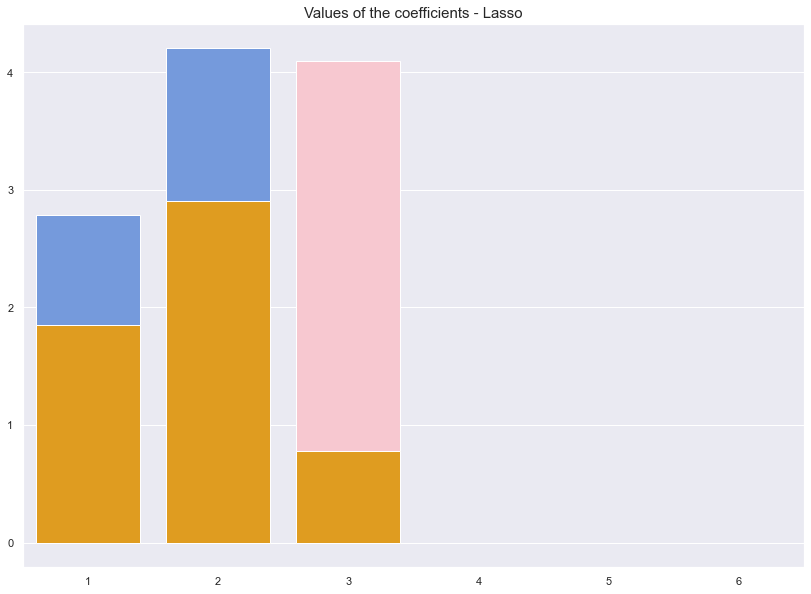

'====================alpha value : 0.01======================'

Ridge Intercept:[2.11635531 1.96561687 2.0244219 ]
Ridge Coefficient:[[ 2.78409161e+00  4.20107655e+00  3.27886006e+00 -1.85485300e-05
   6.96970921e-05  4.21340681e-05]
 [ 7.15223806e-01  1.61731198e+00  4.09007225e+00 -3.72375904e-05
   2.36554844e-05 -1.08712998e-05]
 [ 1.85094021e+00  2.90699406e+00  7.81755453e-01 -8.58161656e-07
   5.15132955e-05  4.01761147e-05]]
Ridge - RMSE : 0.00019966012723228324
Ridge - RSquared : 0.999999998481599


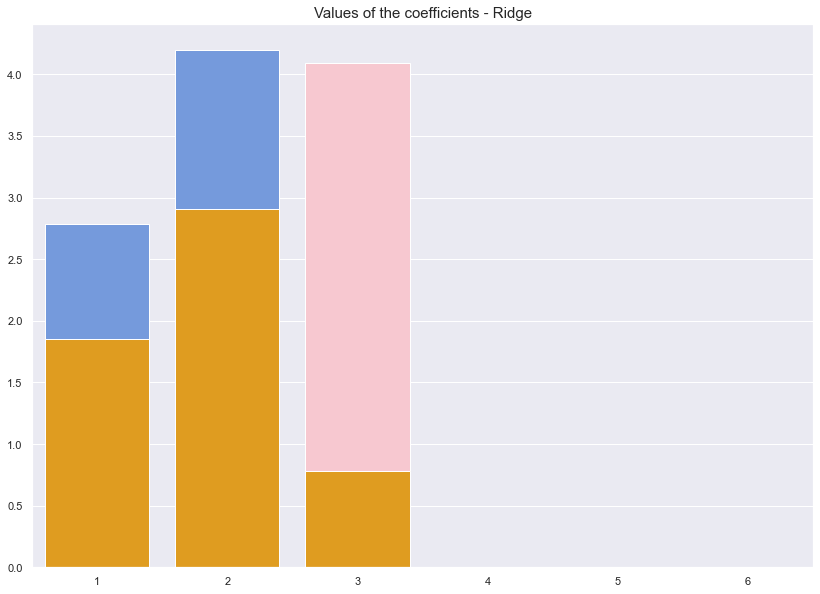

Lasso Intercept:[2.11635531 1.96561687 2.0244219 ]
Lasso Coefficient:[[ 2.77880938  4.19184141  3.26978273 -0.          0.          0.        ]
 [ 0.70983956  1.60797297  4.08105824 -0.          0.          0.        ]
 [ 1.84563505  2.89769697  0.77257644 -0.          0.          0.        ]]
Lasso - RMSE : 0.015482387372814042
Lasso - RSquared : 0.9999892145674876


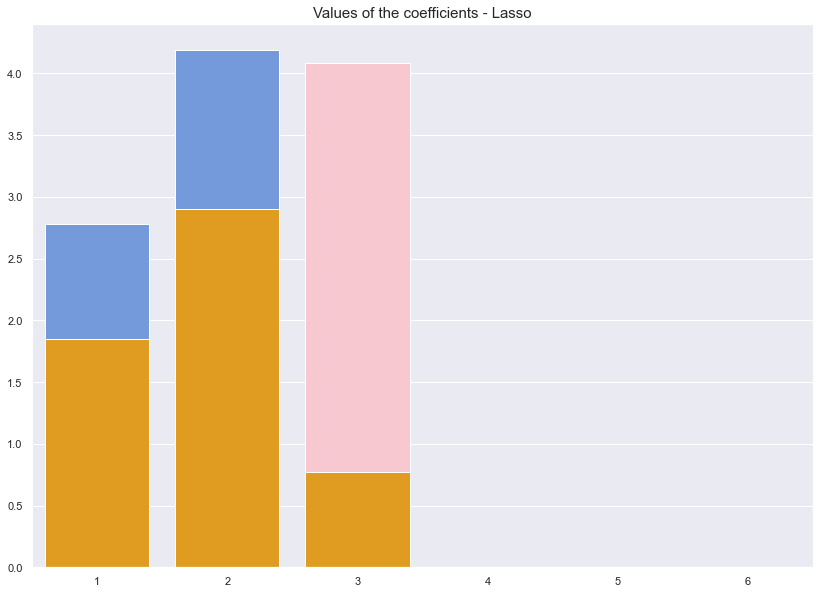

'====================alpha value : 0.001======================'

Ridge Intercept:[2.11635531 1.96561687 2.0244219 ]
Ridge Coefficient:[[ 2.78411884e+00  4.20127028e+00  3.27898231e+00 -1.85507072e-06
   6.97045249e-06  4.21372544e-06]
 [ 7.15171027e-01  1.61740805e+00  4.09024798e+00 -3.72422271e-06
   2.36584640e-06 -1.08732212e-06]
 [ 1.85097907e+00  2.90712061e+00  7.81776598e-01 -8.58120790e-08
   5.15185668e-06  4.01796429e-06]]
Ridge - RMSE : 1.996697782142461e-05
Ridge - RSquared : 0.9999999999848145


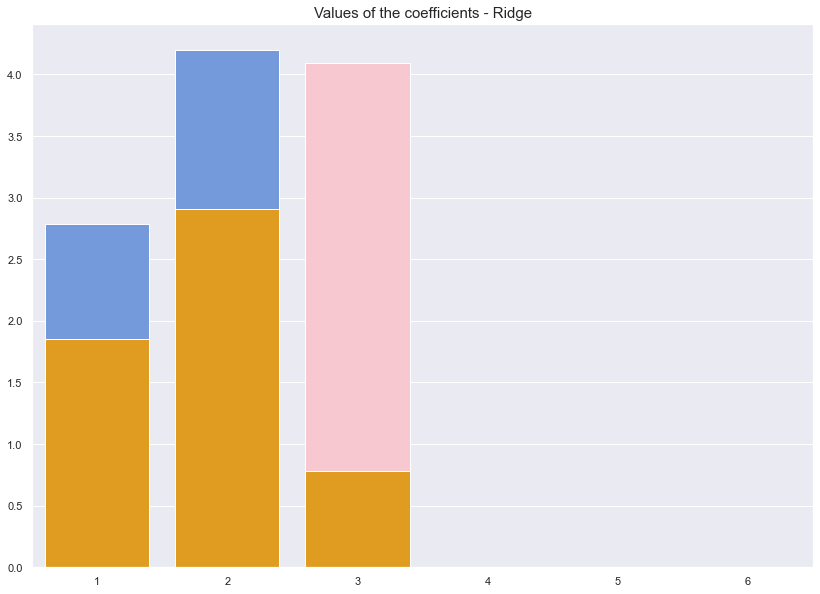

Lasso Intercept:[2.11635531 1.96561687 2.0244219 ]
Lasso Coefficient:[[ 2.78361917  4.20033655  3.27806608 -0.          0.          0.        ]
 [ 0.71465371  1.61646661  4.08934029 -0.          0.          0.        ]
 [ 1.85045622  2.90618819  0.78085642 -0.          0.          0.        ]]
Lasso - RMSE : 0.001544141869940012
Lasso - RSquared : 0.9999998926223116


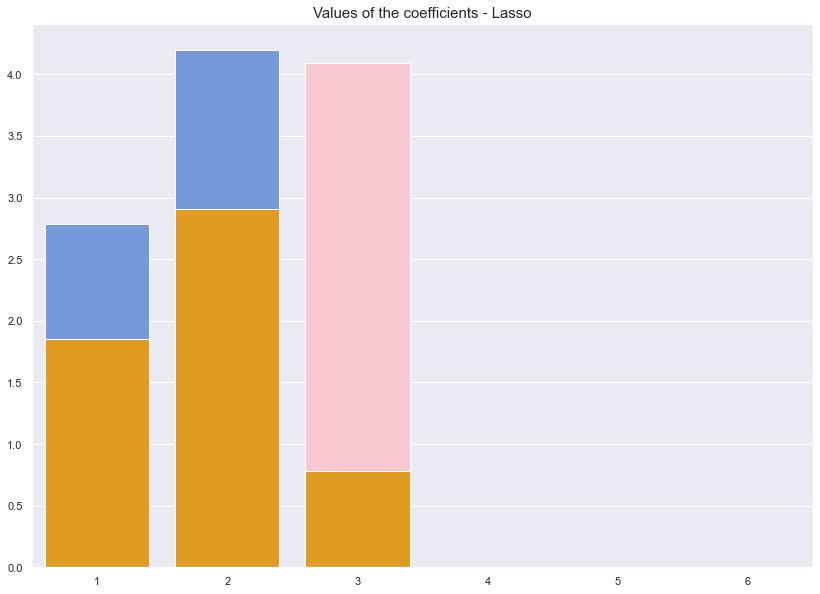

'====================alpha value : 1e-05======================'

Ridge Intercept:[2.11635531 1.96561687 2.0244219 ]
Ridge Coefficient:[[ 2.78412184e+00  4.20129159e+00  3.27899576e+00 -1.85509477e-08
   6.97053417e-08  4.21376022e-08]
 [ 7.15165221e-01  1.61741862e+00  4.09026731e+00 -3.72427374e-08
   2.36587918e-08 -1.08734333e-08]
 [ 1.85098334e+00  2.90713453e+00  7.81778924e-01 -8.58116965e-10
   5.15191460e-08  4.01800292e-08]]
Ridge - RMSE : 1.996708386971649e-07
Ridge - RSquared : 0.9999999999999986


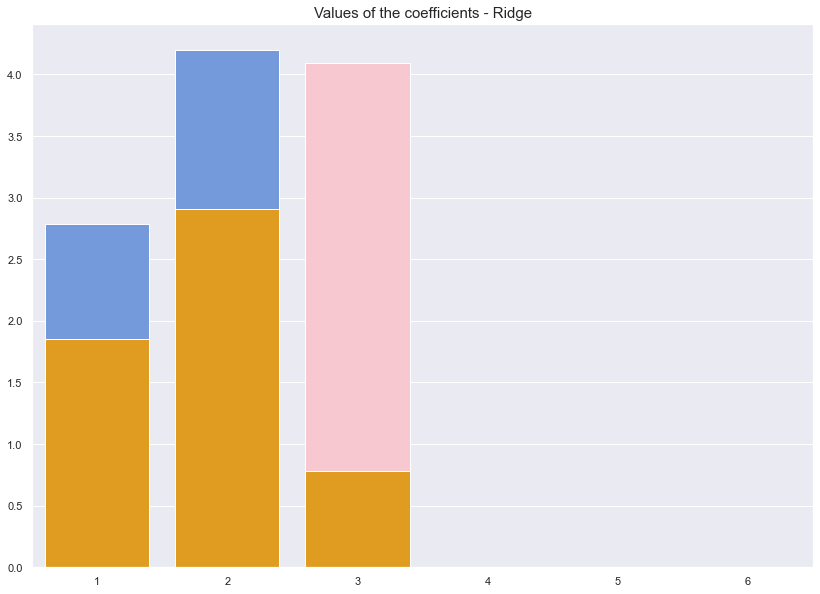

Lasso Intercept:[2.11635531 1.96561687 2.0244219 ]
Lasso Coefficient:[[ 2.78429735e+00  4.20118815e+00  3.27892006e+00 -4.37750808e-05
   2.33635047e-05 -1.87431849e-05]
 [ 7.15312584e-01  1.61732918e+00  4.09020234e+00 -3.51572784e-05
   1.92674532e-05 -1.35533161e-05]
 [ 1.85105444e+00  2.90708510e+00  7.81742058e-01 -1.26699946e-05
   7.07604258e-06 -5.09368900e-08]]
Lasso - RMSE : 0.00012847797706327504
Lasso - RSquared : 0.9999999994034746


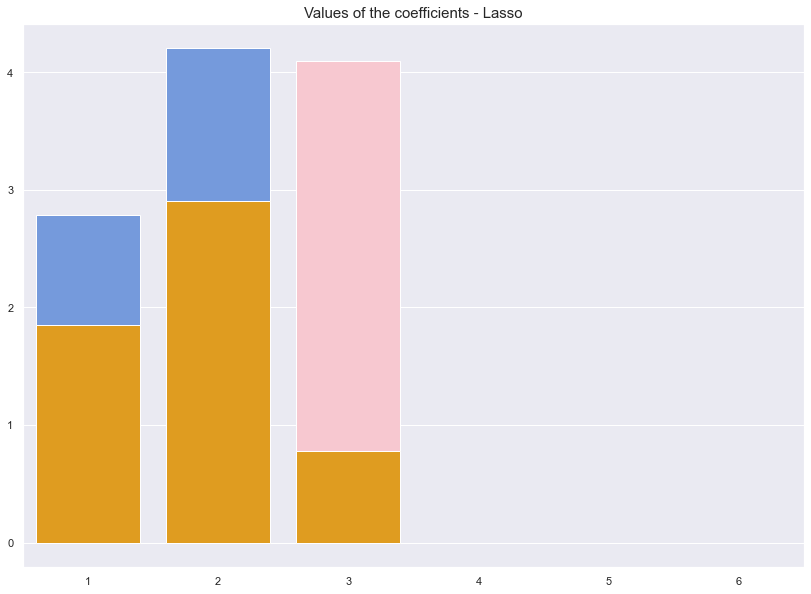

In [111]:
for alpha in alpha_iter:
    analyze_performance(alpha, X_train, Y_train,'train')

#### Performance measure for different alpha values on test set 

'====================alpha value : 10======================'

Ridge Intercept:[1.39309795 1.61093896 1.59511783]
Ridge Coefficient:[[ 2.42810261e+00  3.59915085e+00  2.23978974e+00 -2.03156652e-01
   9.37831327e-02  1.31199617e-01]
 [ 7.33787697e-01  1.40746108e+00  2.64200994e+00 -1.26295922e-01
   1.78344752e-04  6.24824998e-03]
 [ 1.58535280e+00  2.46621603e+00  6.05855783e-01 -1.22140142e-01
   8.31541899e-02  1.09733084e-01]]
Ridge - RMSE : 0.5655192586728401
Ridge - RSquared : 0.9873181955230295


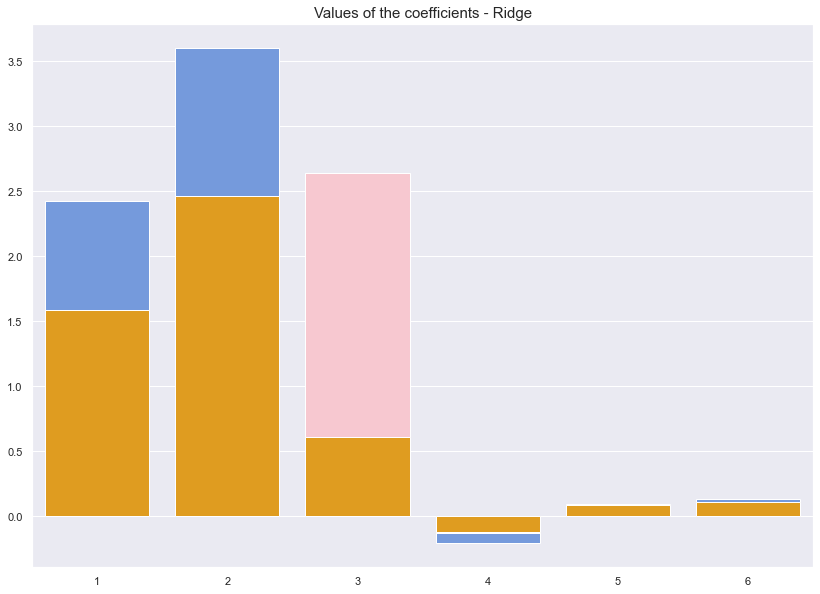

Lasso Intercept:[1.39309795 1.61093896 1.59511783]
Lasso Coefficient:[[ 0.  0.  0. -0.  0.  0.]
 [ 0.  0.  0. -0.  0.  0.]
 [ 0.  0.  0. -0.  0.  0.]]
Lasso - RMSE : 5.144272350294941
Lasso - RSquared : 3.700743415417188e-17


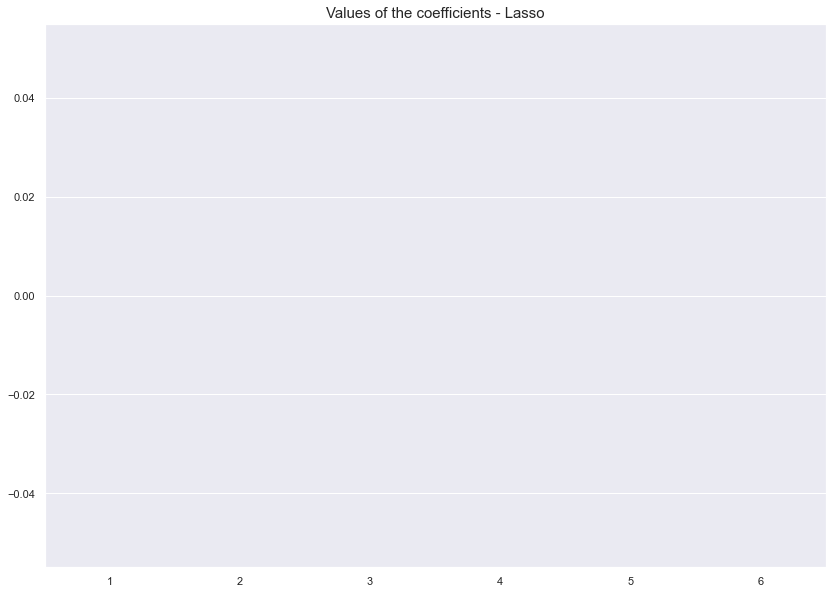

'====================alpha value : 1======================'

Ridge Intercept:[1.39309795 1.61093896 1.59511783]
Ridge Coefficient:[[ 2.54805764e+00  4.16501294e+00  2.43929019e+00 -2.81967576e-02
   1.24877385e-02  1.72333758e-02]
 [ 6.69945496e-01  1.60594074e+00  3.02251044e+00 -1.79520539e-02
  -4.82353609e-04  1.35898624e-04]
 [ 1.69008972e+00  2.87886236e+00  5.91136842e-01 -1.68824771e-02
   1.13373198e-02  1.47639335e-02]]
Ridge - RMSE : 0.0660940585544365
Ridge - RSquared : 0.9998257303907586


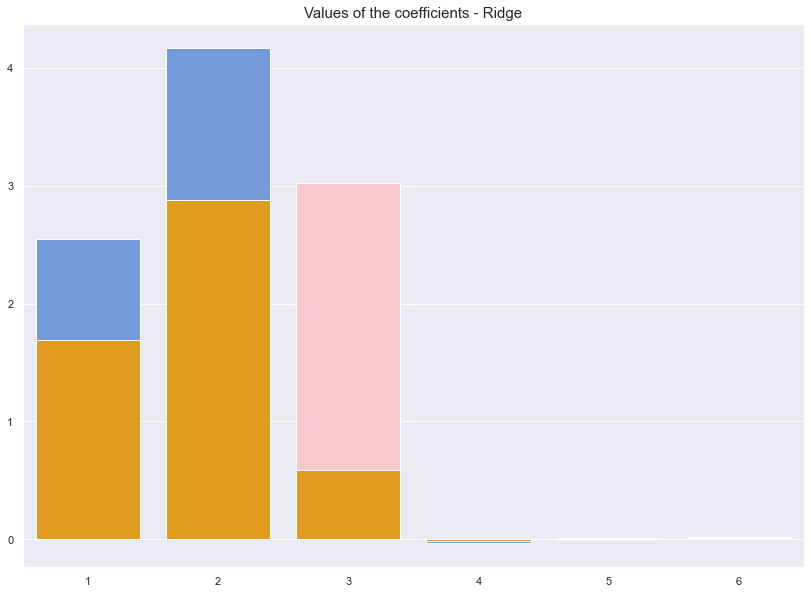

Lasso Intercept:[1.39309795 1.61093896 1.59511783]
Lasso Coefficient:[[ 1.98318374  3.60216209  1.74522469 -0.          0.          0.        ]
 [ 0.08263785  0.99144608  2.35471993 -0.          0.          0.        ]
 [ 1.09746204  2.27848434  0.         -0.          0.          0.        ]]
Lasso - RMSE : 1.3722466046311548
Lasso - RSquared : 0.9114305224410248


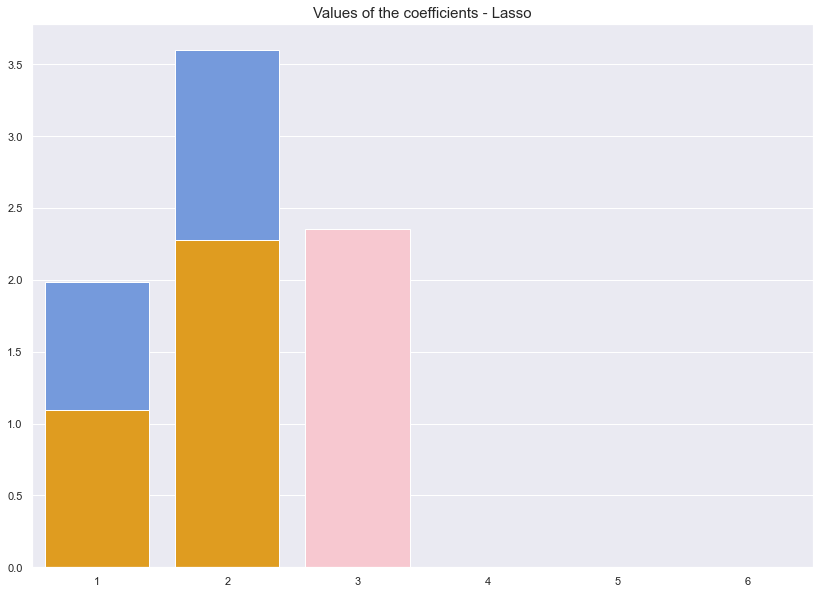

'====================alpha value : 0======================'

Ridge Intercept:[1.39309795 1.61093896 1.59511783]
Ridge Coefficient:[[ 2.55751116e+00  4.24493375e+00  2.46346556e+00 -2.21326726e-15
   0.00000000e+00  0.00000000e+00]
 [ 6.56955038e-01  1.63422005e+00  3.07296303e+00 -1.61552991e-15
  -1.16760553e-16 -4.73127035e-16]
 [ 1.70032452e+00  2.93733324e+00  5.87340020e-01 -8.91964806e-16
   5.19942280e-16 -7.60159891e-17]]
Ridge - RMSE : 3.714406210829166e-15
Ridge - RSquared : 1.0


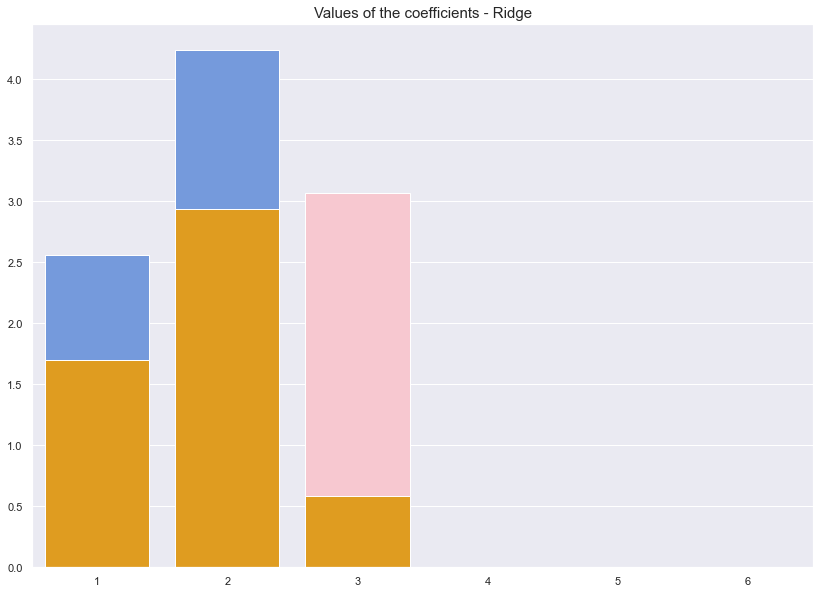

Lasso Intercept:[1.39309795 1.61093896 1.59511783]
Lasso Coefficient:[[ 2.55761995e+00  4.24488584e+00  2.46342457e+00 -3.95439362e-05
  -4.86027769e-06 -1.38625380e-05]
 [ 6.56888255e-01  1.63424853e+00  3.07297099e+00  5.50664104e-06
  -2.43685673e-06  4.96493619e-06]
 [ 1.70042889e+00  2.93728787e+00  5.87301562e-01 -3.68780750e-05
  -4.50538736e-06 -1.32511206e-05]]
Lasso - RMSE : 8.570732310829037e-05
Lasso - RSquared : 0.9999999996824102


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


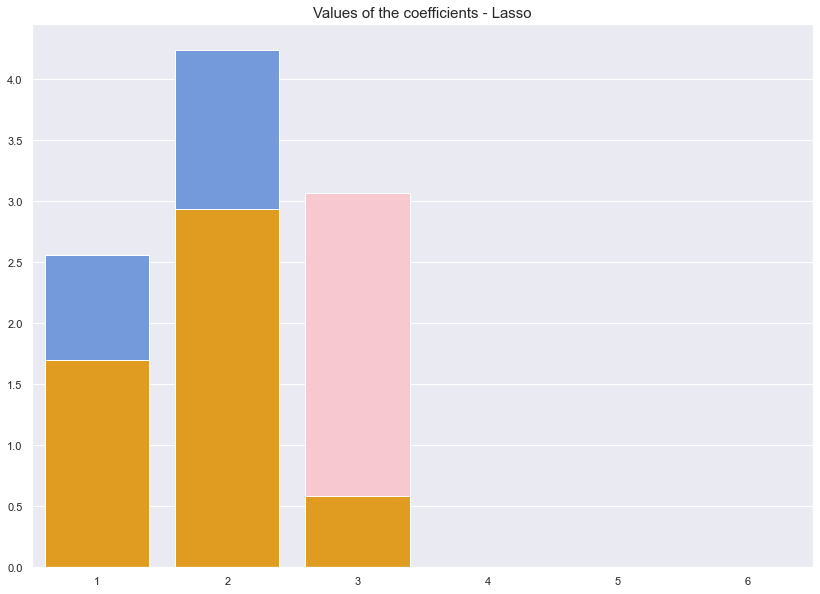

'====================alpha value : 0.01======================'

Ridge Intercept:[1.39309795 1.61093896 1.59511783]
Ridge Coefficient:[[ 2.55742304e+00  4.24411203e+00  2.46322164e+00 -2.93918868e-04
   1.29384926e-04  1.78168204e-04]
 [ 6.57093215e-01  1.63392881e+00  3.07244854e+00 -1.87683017e-04
  -5.65802942e-06  4.77858037e-07]
 [ 1.70022489e+00  2.93673193e+00  5.87380833e-01 -1.75897554e-04
   1.17810272e-04  1.53113448e-04]]
Ridge - RMSE : 0.0006745596530491141
Ridge - RSquared : 0.9999999818350753


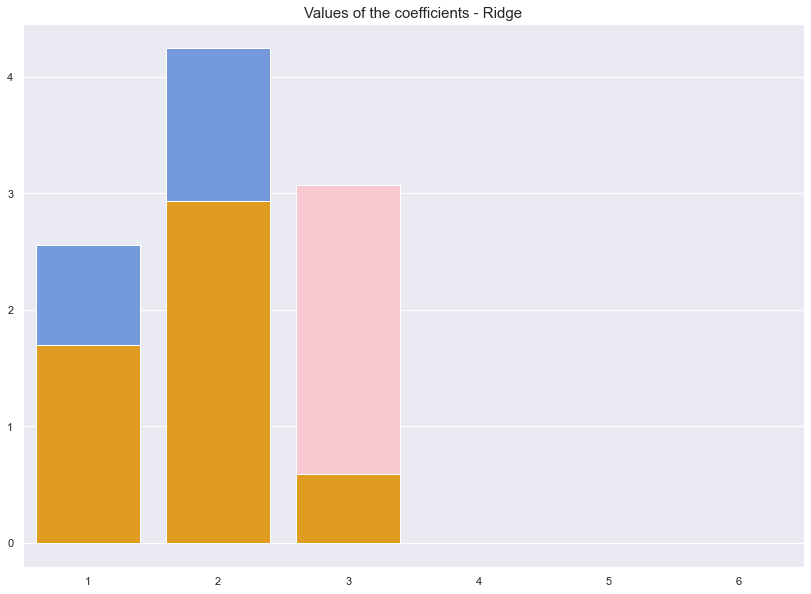

Lasso Intercept:[1.39309795 1.61093896 1.59511783]
Lasso Coefficient:[[ 2.55176628  4.23851963  2.45628082 -0.          0.          0.        ]
 [ 0.65121102  1.62779054  3.06578118 -0.          0.          0.        ]
 [ 1.69458551  2.930918    0.58015395 -0.          0.          0.        ]]
Lasso - RMSE : 0.01390671283626116
Lasso - RSquared : 0.9999908369847903


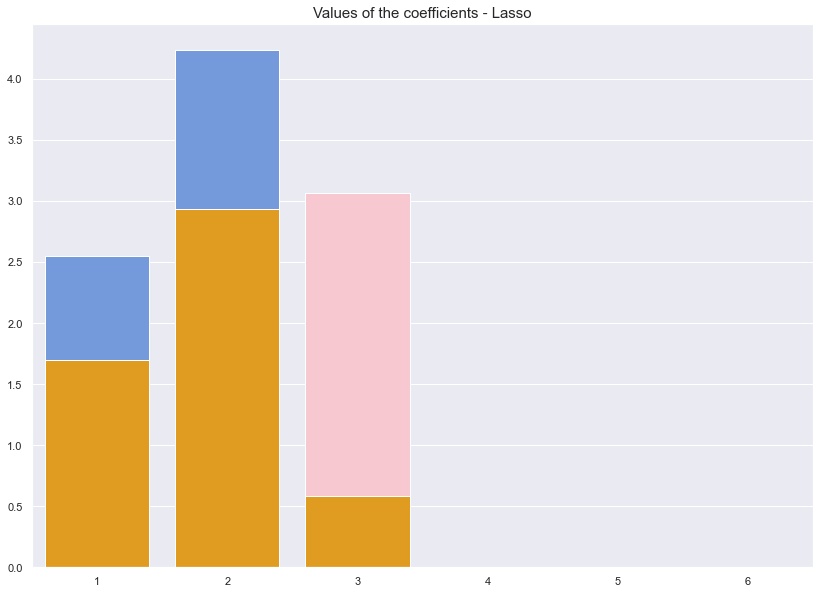

'====================alpha value : 0.001======================'

Ridge Intercept:[1.39309795 1.61093896 1.59511783]
Ridge Coefficient:[[ 2.55750236e+00  4.24485156e+00  2.46344117e+00 -2.94031624e-05
   1.29427204e-05  1.78222774e-05]
 [ 6.56968863e-01  1.63419092e+00  3.07291157e+00 -1.87760114e-05
  -5.66596521e-07  4.69414412e-08]
 [ 1.70031456e+00  2.93727310e+00  5.87344104e-01 -1.75964282e-05
   1.17851945e-05  1.53164753e-05]]
Ridge - RMSE : 6.746873413701916e-05
Ridge - RSquared : 0.9999999998182809


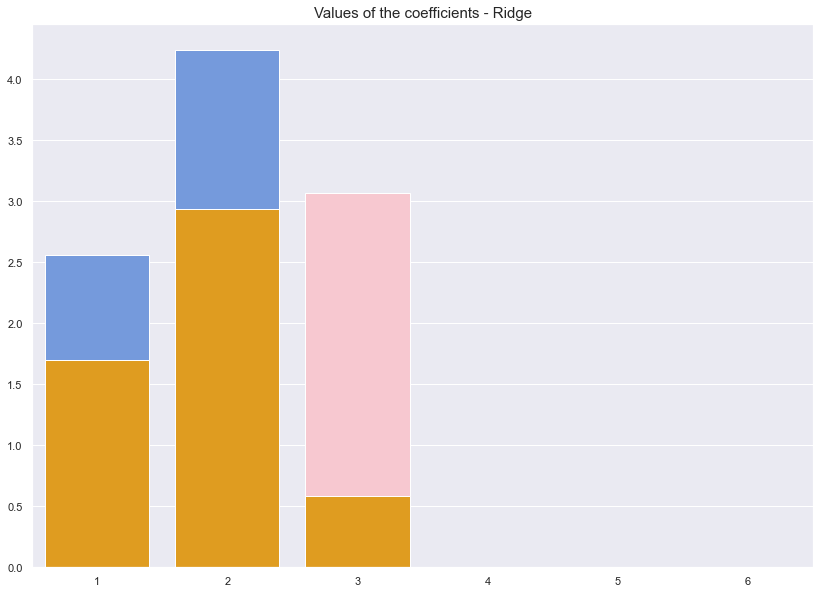

Lasso Intercept:[1.39309795 1.61093896 1.59511783]
Lasso Coefficient:[[ 2.55695401  4.24429433  2.46274212 -0.          0.          0.        ]
 [ 0.65637405  1.6335765   3.0722467  -0.          0.          0.        ]
 [ 1.69976617  2.93669369  0.58661692 -0.          0.          0.        ]]
Lasso - RMSE : 0.0013854515873824023
Lasso - RSquared : 0.9999999088702176


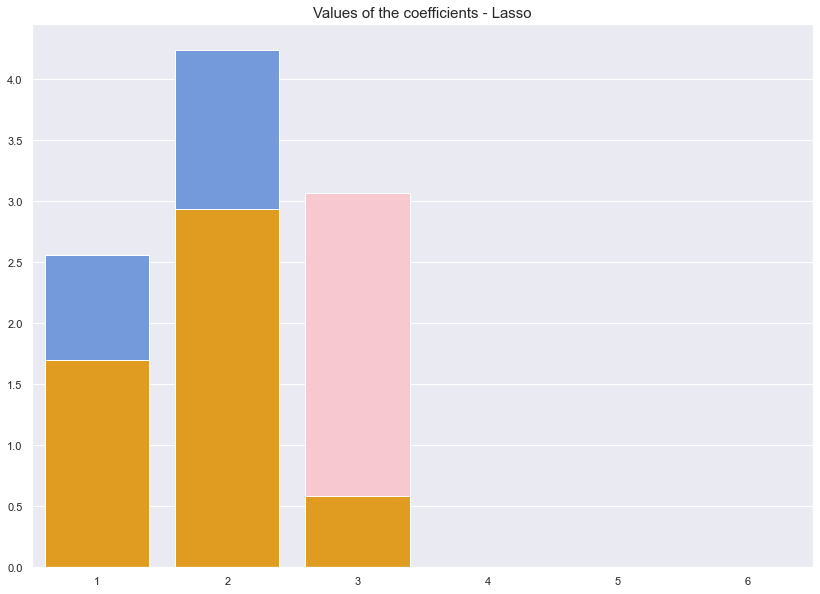

'====================alpha value : 1e-05======================'

Ridge Intercept:[1.39309795 1.61093896 1.59511783]
Ridge Coefficient:[[ 2.55751108e+00  4.24493293e+00  2.46346532e+00 -2.94044034e-07
   1.29431856e-07  1.78228778e-07]
 [ 6.56955176e-01  1.63421976e+00  3.07296251e+00 -1.87768600e-07
  -5.66683857e-09  4.68484709e-10]
 [ 1.70032442e+00  2.93733264e+00  5.87340061e-01 -1.75971625e-07
   1.17856531e-07  1.53170398e-07]]
Ridge - RMSE : 6.747013926260461e-07
Ridge - RSquared : 0.9999999999999818


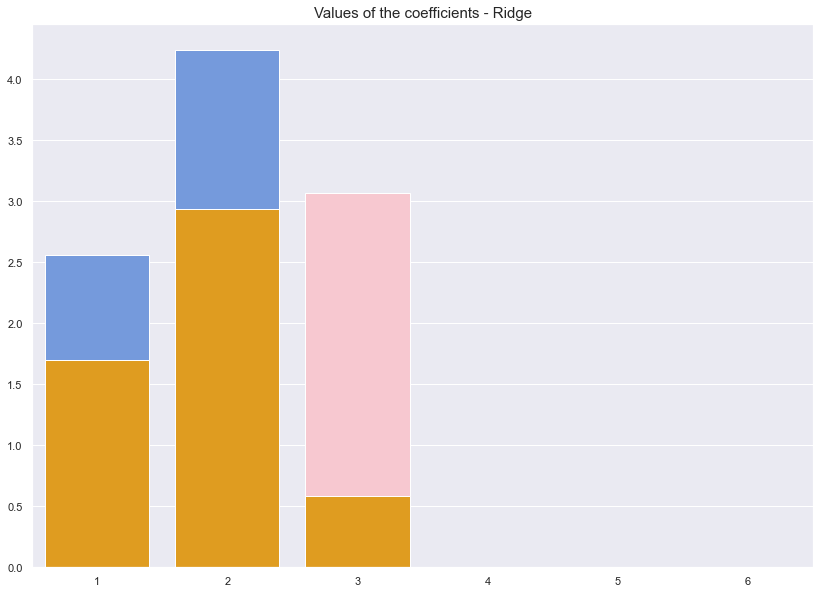

Lasso Intercept:[1.39309795 1.61093896 1.59511783]
Lasso Coefficient:[[ 2.55761018e+00  4.24487651e+00  2.46342235e+00 -2.68519226e-05
   0.00000000e+00 -0.00000000e+00]
 [ 6.56881888e-01  1.63424331e+00  3.07296609e+00  0.00000000e+00
  -0.00000000e+00  0.00000000e+00]
 [ 1.70041912e+00  2.93727854e+00  5.87299343e-01 -2.41860614e-05
   0.00000000e+00 -0.00000000e+00]]
Lasso - RMSE : 8.362952604875247e-05
Lasso - RSquared : 0.9999999996898765


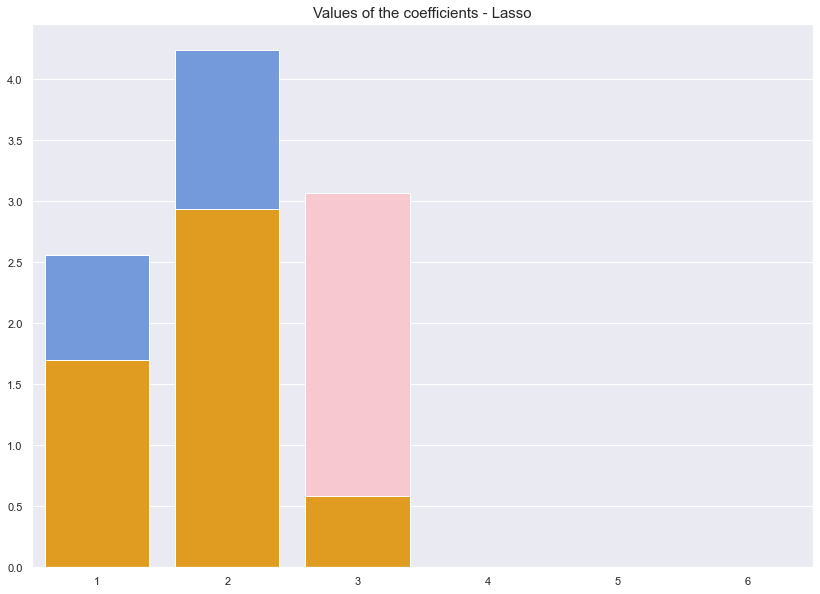

In [112]:
for alpha in alpha_iter:
    analyze_performance(alpha, X_test, Y_test,'test')

In [113]:
df_analyzer = pd.DataFrame(df_analyzer)

## Ridge

#### Performance measure for different alpha value on Ridge Regression

In [114]:
display(df_analyzer[df_analyzer['Type of Regression'] == 'Ridge'].sort_values(by=['Alpha'],ascending=False))

,Alpha,Type of Regression,TypeofData,RMSE,RMSE_Y1,RMSE_Y2,RMSE_Y3,RSquared,RSquared_Y1,RSquared_Y2,...,Coefficient_Y2_X4,Coefficient_Y2_X5,Coefficient_Y2_X6,Coefficient_Y3,Coefficient_Y3_X1,Coefficient_Y3_X2,Coefficient_Y3_X3,Coefficient_Y3_X4,Coefficient_Y3_X5,Coefficient_Y3_X6
0,10.00000,Ridge,train,1.896905e-01,2.328820e-01,1.859930e-01,1.382751e-01,0.998632,0.998781,0.692932,...,-3.259768e-02,2.067677e-02,-8.976586e-03,"[1.8078523350490219, 2.774820231693781, 0.7590...",1.807852,2.774820,0.759089,-9.029708e-04,4.615712e-02,3.654876e-02
12,10.00000,Ridge,test,5.655193e-01,7.155642e-01,4.805150e-01,4.653055e-01,0.987318,0.988914,0.683305,...,-1.262959e-01,1.783448e-04,6.248250e-03,"[1.5853527992308871, 2.46621602524401, 0.60585...",1.585353,2.466216,0.605856,-1.221401e-01,8.315419e-02,1.097331e-01
2,1.00000,Ridge,train,1.986065e-02,2.432138e-02,1.956291e-02,1.446025e-02,0.999985,0.999987,0.697645,...,-3.673303e-03,2.333127e-03,-1.066253e-03,"[1.8466650793686712, 2.8931615865559865, 0.779...",1.846665,2.893162,0.779438,-8.626638e-05,5.093873e-03,3.979107e-03
14,1.00000,Ridge,test,6.609406e-02,8.313464e-02,5.610748e-02,5.518928e-02,0.999826,0.999850,0.710584,...,-1.795205e-02,-4.823536e-04,1.358986e-04,"[1.6900897227953229, 2.878862361537189, 0.5911...",1.690090,2.878862,0.591137,-1.688248e-02,1.133732e-02,1.476393e-02
6,0.01000,Ridge,train,1.996601e-04,2.444315e-04,1.967733e-04,1.453480e-04,1.000000,1.000000,0.698088,...,-3.723759e-05,2.365548e-05,-1.087130e-05,"[1.850940207533339, 2.9069940630188276, 0.7817...",1.850940,2.906994,0.781755,-8.581617e-07,5.151330e-05,4.017611e-05
18,0.01000,Ridge,test,6.745597e-04,8.478952e-04,5.723863e-04,5.643932e-04,1.000000,1.000000,0.713241,...,-1.876830e-04,-5.658029e-06,4.778580e-07,"[1.7002248940486544, 2.936731929420949, 0.5873...",1.700225,2.936732,0.587381,-1.758976e-04,1.178103e-04,1.531134e-04
8,0.00100,Ridge,train,1.996698e-05,2.444427e-05,1.967837e-05,1.453548e-05,1.000000,1.000000,0.698092,...,-3.724223e-06,2.365846e-06,-1.087322e-06,"[1.8509790657958383, 2.9071206093172965, 0.781...",1.850979,2.907121,0.781777,-8.581208e-08,5.151857e-06,4.017964e-06
20,0.00100,Ridge,test,6.746873e-05,8.480504e-05,5.724922e-05,5.645106e-05,1.000000,1.000000,0.713265,...,-1.877601e-05,-5.665965e-07,4.694144e-08,"[1.7003145576596217, 2.9372730961716487, 0.587...",1.700315,2.937273,0.587344,-1.759643e-05,1.178519e-05,1.531648e-05
10,0.00001,Ridge,train,1.996708e-07,2.444439e-07,1.967849e-07,1.453555e-07,1.000000,1.000000,0.698092,...,-3.724274e-08,2.365879e-08,-1.087343e-08,"[1.8509833401960545, 2.907134530292918, 0.7817...",1.850983,2.907135,0.781779,-8.581170e-10,5.151915e-08,4.018003e-08
22,0.00001,Ridge,test,6.747014e-07,8.480675e-07,5.725038e-07,5.645235e-07,1.000000,1.000000,0.713268,...,-1.877686e-07,-5.666839e-09,4.684847e-10,"[1.7003244177372503, 2.937332641657237, 0.5873...",1.700324,2.937333,0.587340,-1.759716e-07,1.178565e-07,1.531704e-07


#### Performance measure for different alpha value on Ridge Regression - Graphically

In [115]:
ridge_analyze = df_analyzer[df_analyzer['Type of Regression'] == 'Ridge'].sort_values(by=['Alpha'],ascending=False)

#### RMSE - Ridge

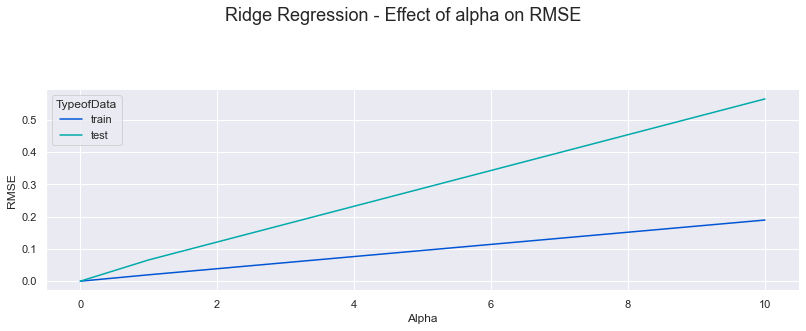

In [116]:
fig,ax = plt.subplots(1,1, figsize=(12,5))

sns.lineplot(x = 'Alpha', y = 'RMSE', hue='TypeofData', data = ridge_analyze,palette = 'winter',legend=True).set(title=f'')        
sns.despine(fig)      
fig.suptitle('Ridge Regression - Effect of alpha on RMSE', fontsize = 18)
plt.tight_layout(pad = 3)
plt.show()

#### RSquared - Ridge

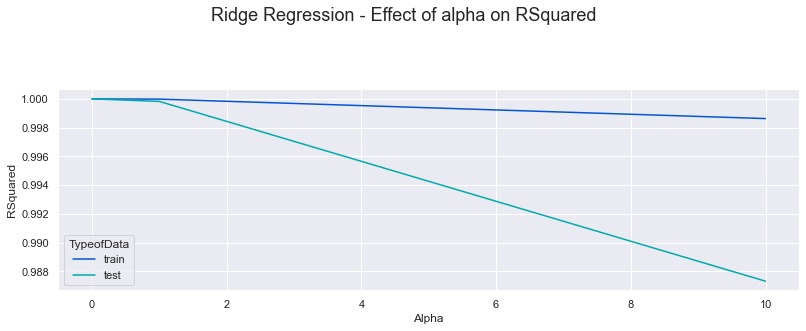

In [117]:
fig,ax = plt.subplots(1,1, figsize=(12,5))
sns.lineplot(x = 'Alpha', y = 'RSquared', hue='TypeofData', data = ridge_analyze,palette = 'winter',legend=True).set(title=f'')
sns.despine(fig)      
fig.suptitle('Ridge Regression - Effect of alpha on RSquared', fontsize = 18)
plt.tight_layout(pad = 3)
plt.show()

### Plotting weights for different combination for all selected values of alpha

#### Plot of coefficient of X1 to X6 for different Y1 for different alpha

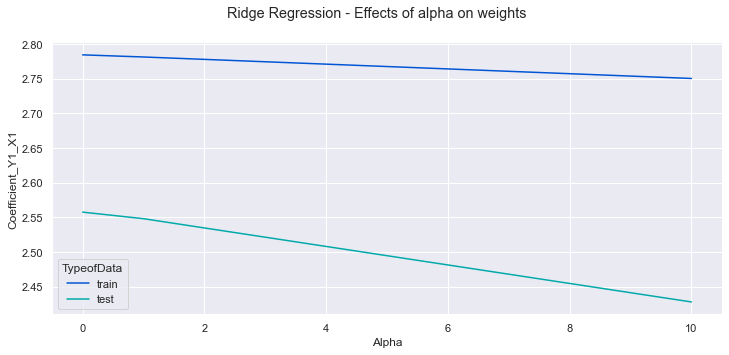

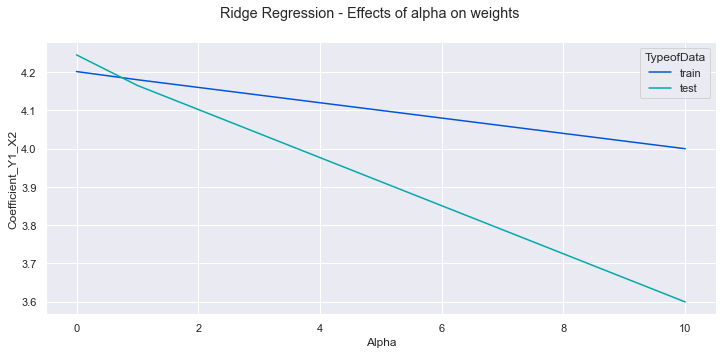

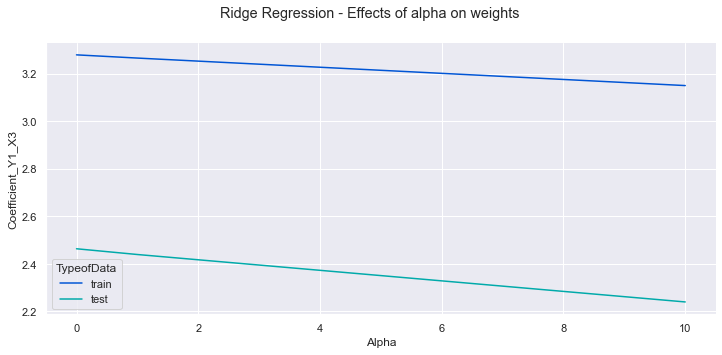

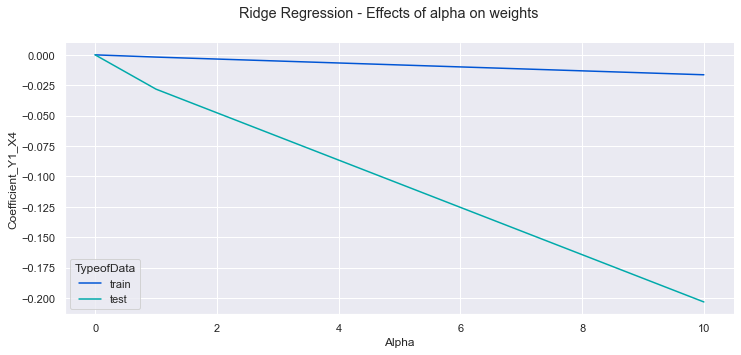

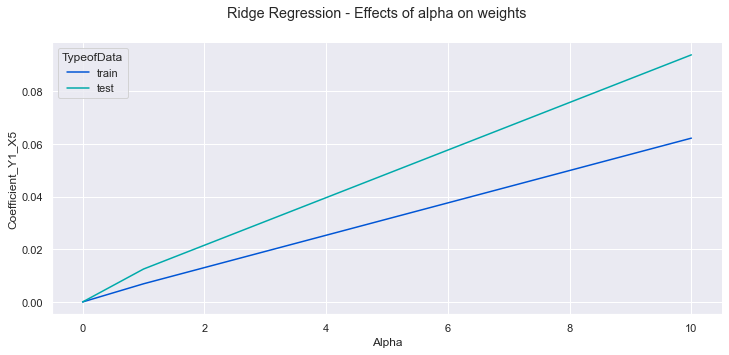

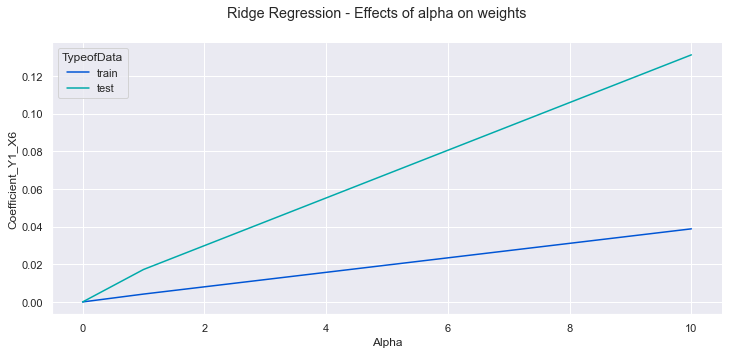

In [118]:
plotWeights('X1','Y1')
plotWeights('X2','Y1')
plotWeights('X3','Y1')
plotWeights('X4','Y1')
plotWeights('X5','Y1')
plotWeights('X6','Y1')

#### Plot of coefficient of X1 to X6 for different Y2 for different alpha

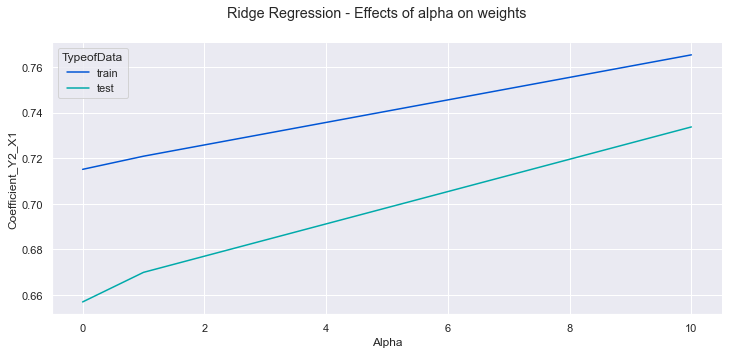

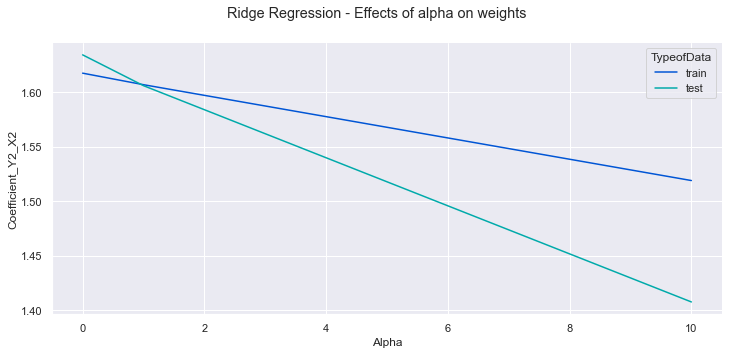

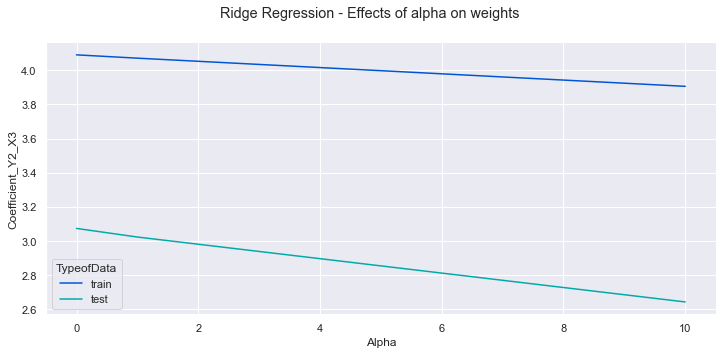

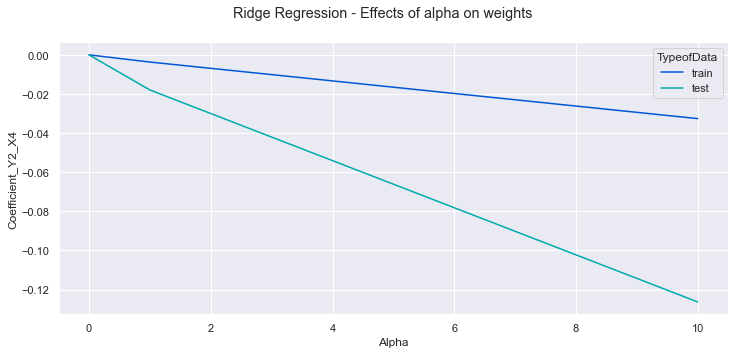

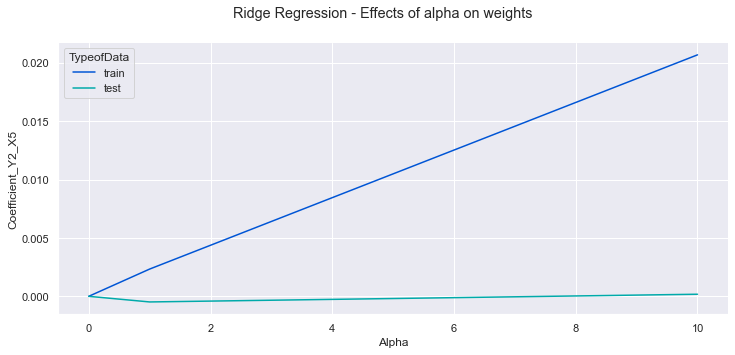

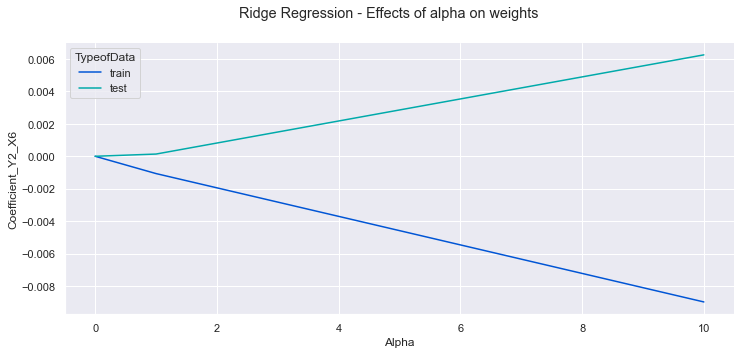

In [119]:
plotWeights('X1','Y2')
plotWeights('X2','Y2')
plotWeights('X3','Y2')
plotWeights('X4','Y2')
plotWeights('X5','Y2')
plotWeights('X6','Y2')

#### Plot of coefficient of X1 to X6 for different Y3 for different alpha

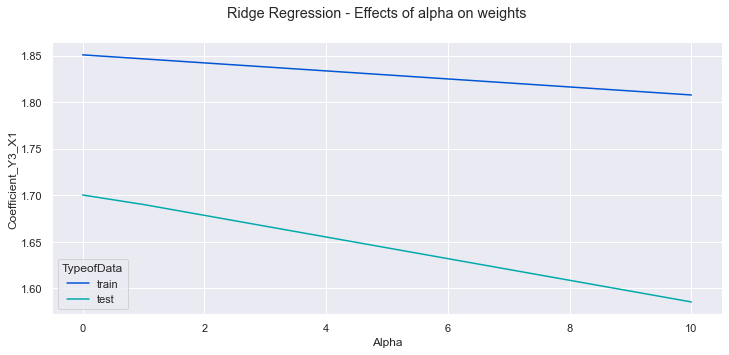

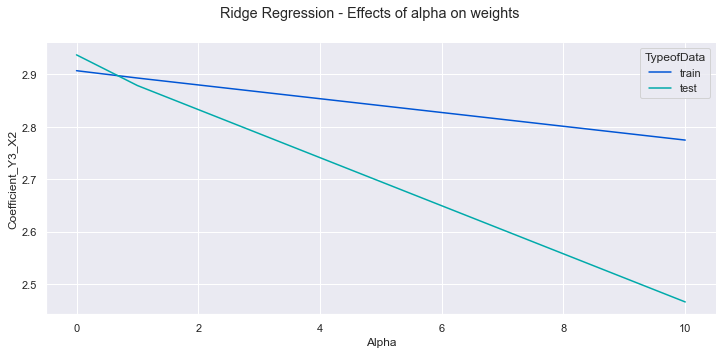

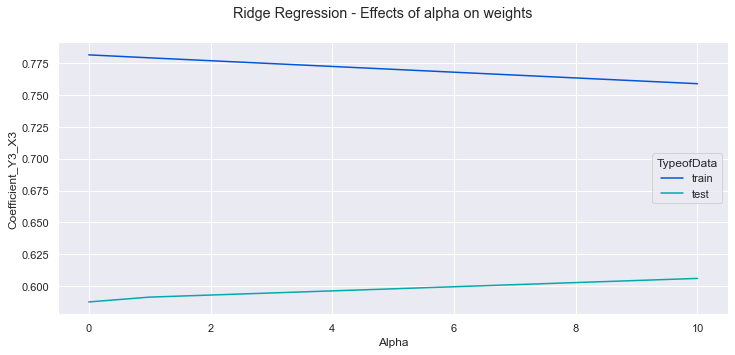

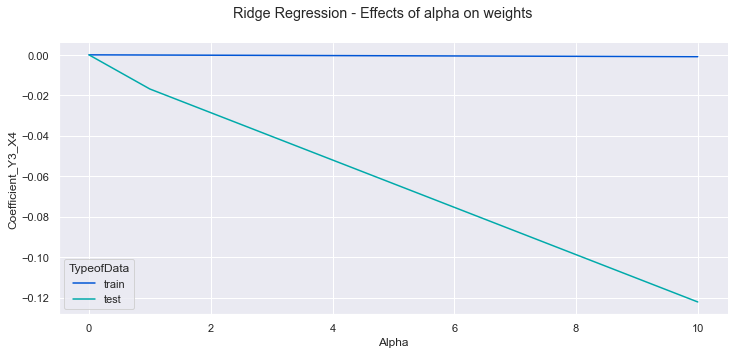

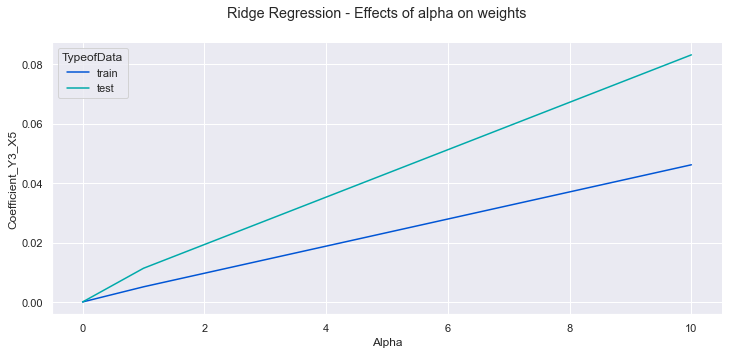

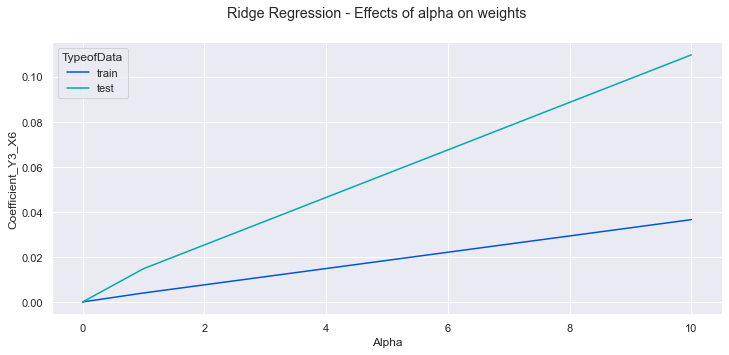

In [120]:
plotWeights('X1','Y3')
plotWeights('X2','Y3')
plotWeights('X3','Y3')
plotWeights('X4','Y3')
plotWeights('X5','Y3')
plotWeights('X6','Y3')

## Lasso

#### Performance measure for different alpha value on Lasso Regression

In [121]:
display(df_analyzer[df_analyzer['Type of Regression'] == 'Lasso'].sort_values(by=['Alpha'],ascending=False))

,Alpha,Type of Regression,TypeofData,RMSE,RMSE_Y1,RMSE_Y2,RMSE_Y3,RSquared,RSquared_Y1,RSquared_Y2,...,Coefficient_Y2_X4,Coefficient_Y2_X5,Coefficient_Y2_X6,Coefficient_Y3,Coefficient_Y3_X1,Coefficient_Y3_X2,Coefficient_Y3_X3,Coefficient_Y3_X4,Coefficient_Y3_X5,Coefficient_Y3_X6
1,10.00000,Lasso,train,5.193784,6.669841,4.587932,3.923044,3.700743e-17,0.000000,-0.000511,...,-0.000000,0.000000,0.000000,"[0.0, 0.0, 0.0, -0.0, 0.0, 0.0]",0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000e+00
13,10.00000,Lasso,test,5.144272,6.795977,4.054434,4.094738,3.700743e-17,0.000000,-0.001027,...,-0.000000,0.000000,0.000000,"[0.0, 0.0, 0.0, -0.0, 0.0, 0.0]",0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000e+00
3,1.00000,Lasso,train,1.525856,1.548967,1.548968,1.478549,8.966788e-01,0.946067,0.471455,...,-0.000000,0.000000,0.000000,"[1.272853404199878, 1.9829813715261075, 0.0, -...",1.272853,1.982981,0.000000,-0.000000,0.000000,0.000000e+00
15,1.00000,Lasso,test,1.372247,1.391168,1.391164,1.333603,9.114305e-01,0.958096,0.502402,...,-0.000000,0.000000,0.000000,"[1.0974620433284297, 2.2784843370870727, 0.0, ...",1.097462,2.278484,0.000000,-0.000000,0.000000,0.000000e+00
7,0.01000,Lasso,train,0.015482,0.015479,0.015482,0.015487,9.999892e-01,0.999995,0.696362,...,-0.000000,0.000000,0.000000,"[1.8456350511839668, 2.8976969735170033, 0.772...",1.845635,2.897697,0.772576,-0.000000,0.000000,0.000000e+00
19,0.01000,Lasso,test,0.013907,0.013905,0.013913,0.013902,9.999908e-01,0.999996,0.711574,...,-0.000000,0.000000,0.000000,"[1.6945855126308917, 2.9309180030798228, 0.580...",1.694586,2.930918,0.580154,-0.000000,0.000000,0.000000e+00
9,0.00100,Lasso,train,0.001544,0.001542,0.001544,0.001547,9.999999e-01,1.000000,0.697921,...,-0.000000,0.000000,0.000000,"[1.8504562163409009, 2.9061881850825495, 0.780...",1.850456,2.906188,0.780856,-0.000000,0.000000,0.000000e+00
21,0.00100,Lasso,test,0.001385,0.001380,0.001395,0.001381,9.999999e-01,1.000000,0.713098,...,-0.000000,0.000000,0.000000,"[1.6997661713062797, 2.9366936938129062, 0.586...",1.699766,2.936694,0.586617,-0.000000,0.000000,0.000000e+00
11,0.00001,Lasso,train,0.000128,0.000161,0.000136,0.000070,1.000000e+00,1.000000,0.698097,...,-0.000035,0.000019,-0.000014,"[1.851054444169165, 2.907085097959409, 0.78174...",1.851054,2.907085,0.781742,-0.000013,0.000007,-5.093689e-08
23,0.00001,Lasso,test,0.000084,0.000093,0.000068,0.000088,1.000000e+00,1.000000,0.713262,...,0.000000,-0.000000,0.000000,"[1.7004191200184435, 2.937278541770019, 0.5872...",1.700419,2.937279,0.587299,-0.000024,0.000000,-0.000000e+00


#### Performance measure for different alpha value on Lasso Regression - Graphically

In [122]:
lasso_analyze = df_analyzer[df_analyzer['Type of Regression'] == 'Lasso'].sort_values(by=['Alpha'],ascending=False)

#### RMSE - Lasso

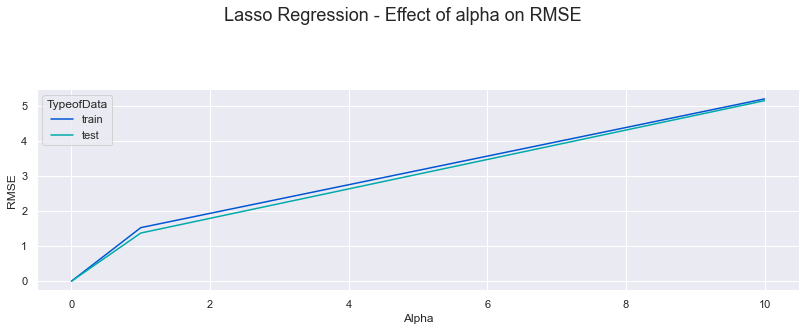

In [123]:
fig,ax = plt.subplots(1,1, figsize=(12,5))
sns.lineplot(x = 'Alpha', y = 'RMSE', hue='TypeofData', data = lasso_analyze,palette = 'winter',legend=True).set(title=f'')
sns.despine(fig)      
fig.suptitle('Lasso Regression - Effect of alpha on RMSE', fontsize = 18)
plt.tight_layout(pad = 3)
plt.show()

#### RSquared - Lasso

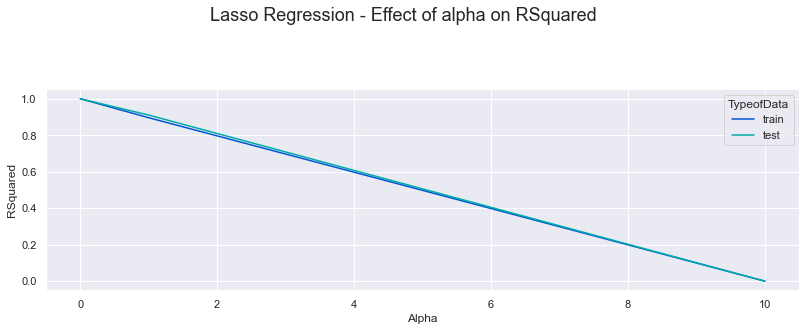

In [124]:
fig,ax = plt.subplots(1,1, figsize=(12,5))
sns.lineplot(x = 'Alpha', y = 'RSquared', hue='TypeofData', data = lasso_analyze,palette = 'winter',legend=True).set(title=f'')
sns.despine(fig)      
fig.suptitle('Lasso Regression - Effect of alpha on RSquared', fontsize = 18)
plt.tight_layout(pad = 3)
plt.show()

### Plotting weights for different combination for all selected values of alpha

#### Plot of coefficient of X1 to X6 for different Y1 for different alpha

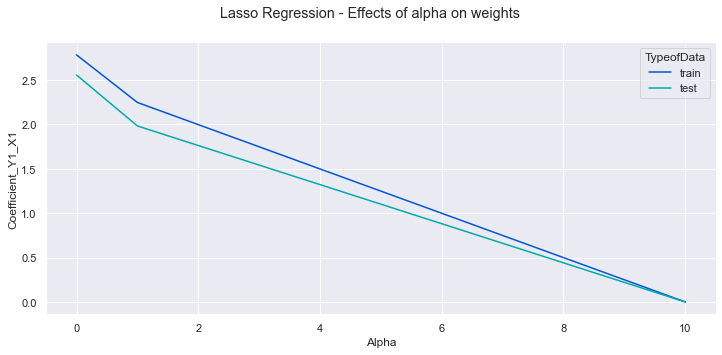

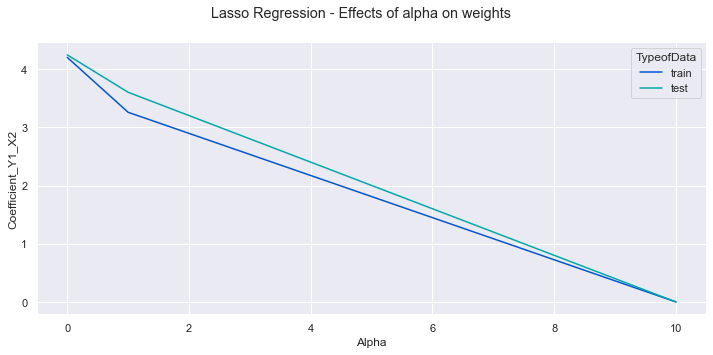

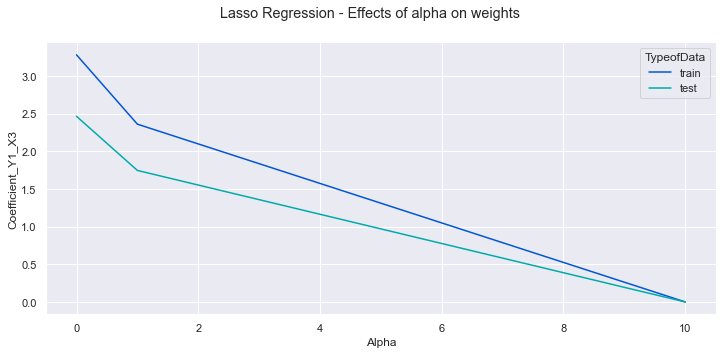

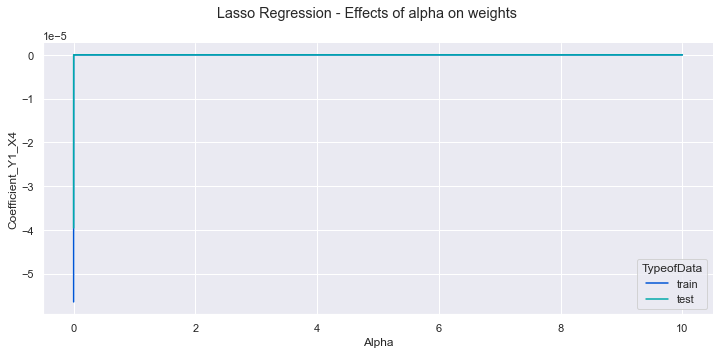

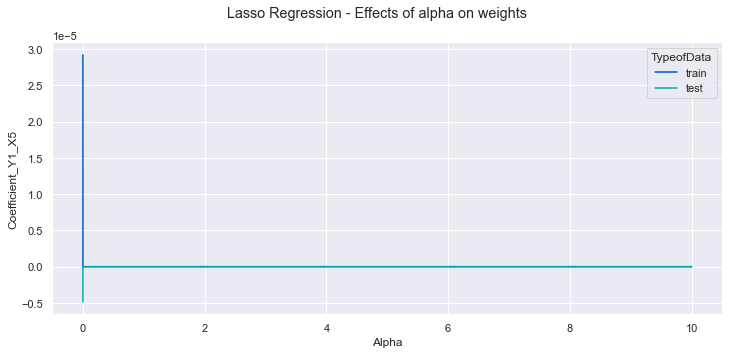

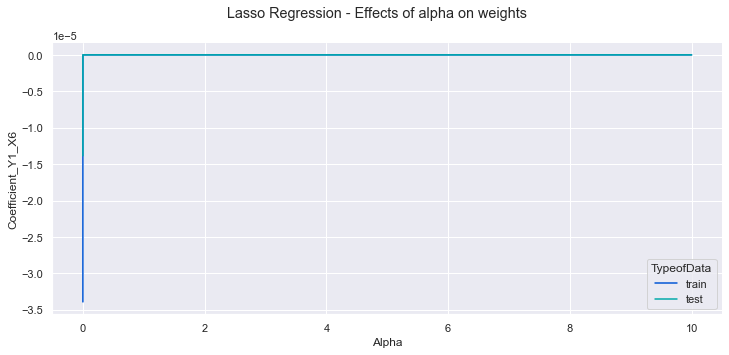

In [125]:
plotWeights('X1','Y1',1)
plotWeights('X2','Y1',1)
plotWeights('X3','Y1',1)
plotWeights('X4','Y1',1)
plotWeights('X5','Y1',1)
plotWeights('X6','Y1',1)

#### Plot of coefficient of X1 to X6 for different Y2 for different alpha

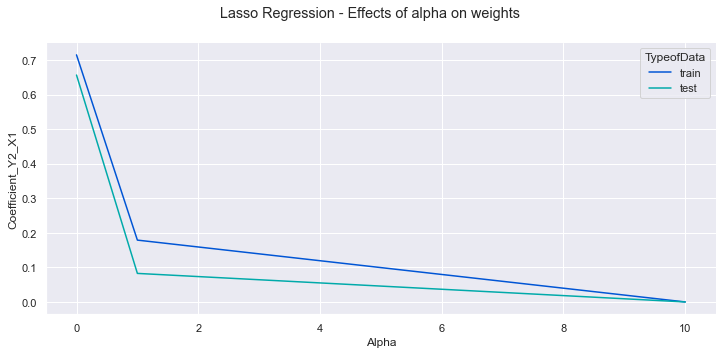

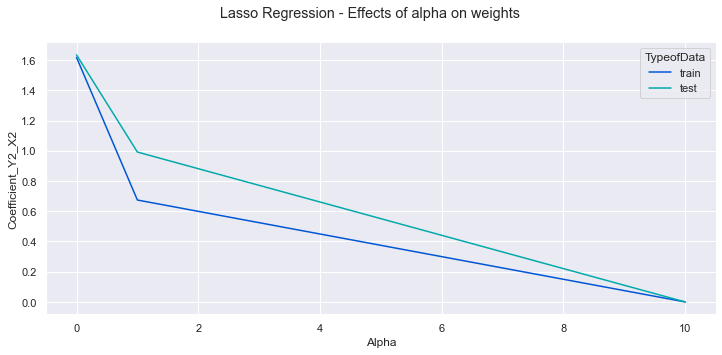

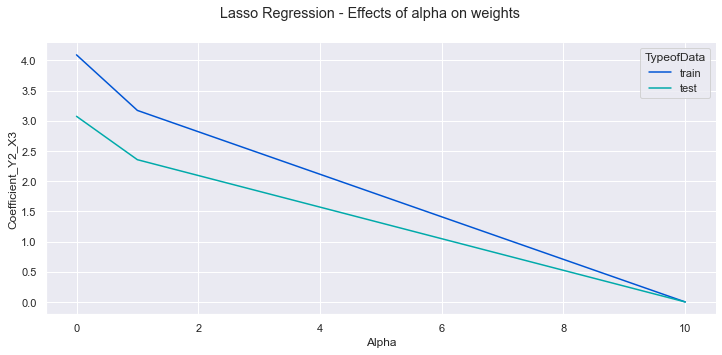

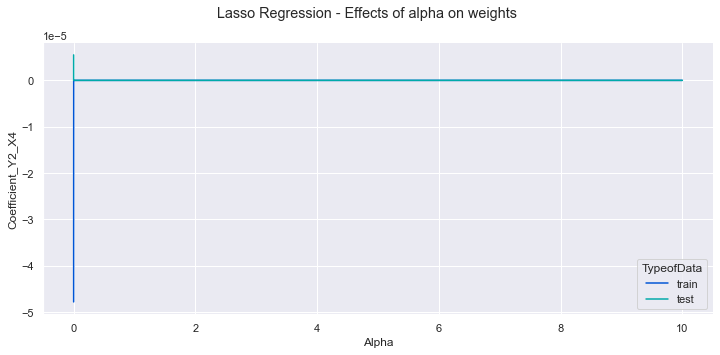

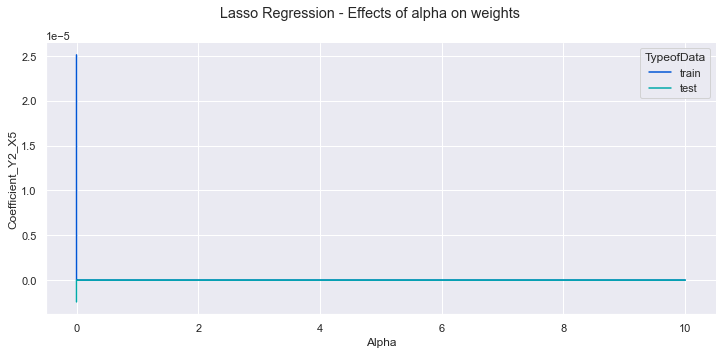

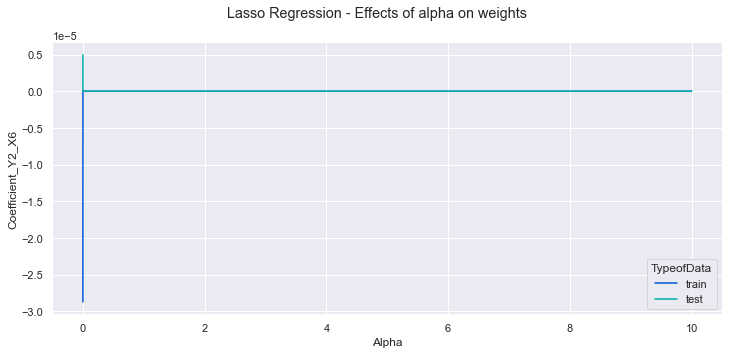

In [126]:
plotWeights('X1','Y2',1)
plotWeights('X2','Y2',1)
plotWeights('X3','Y2',1)
plotWeights('X4','Y2',1)
plotWeights('X5','Y2',1)
plotWeights('X6','Y2',1)

#### Plot of coefficient of X1 to X6 for different Y3 for different alpha

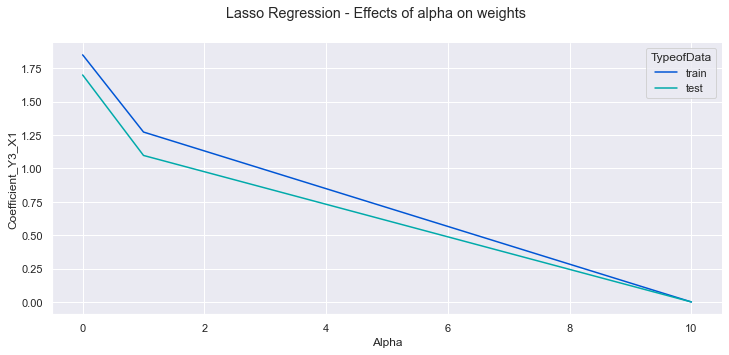

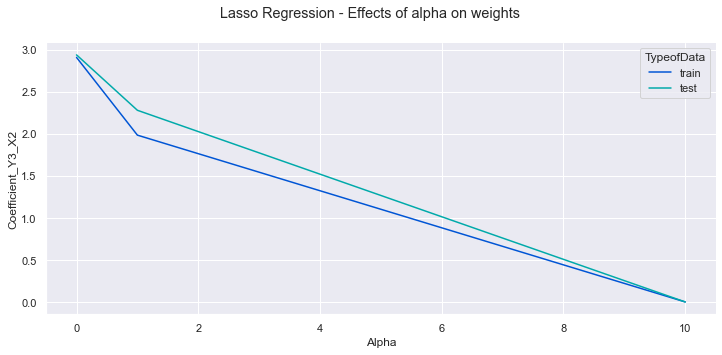

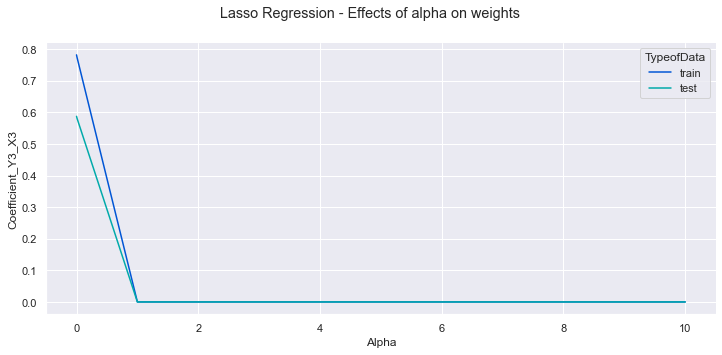

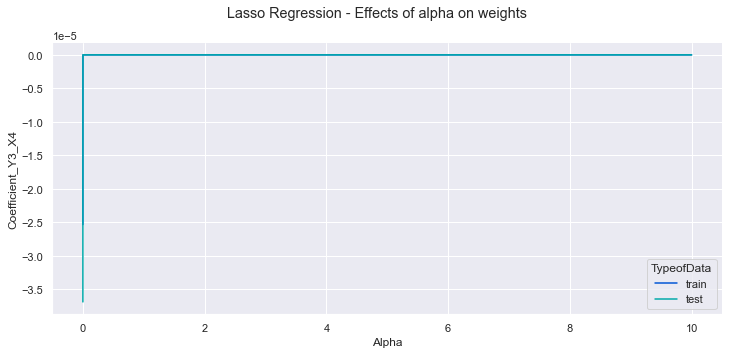

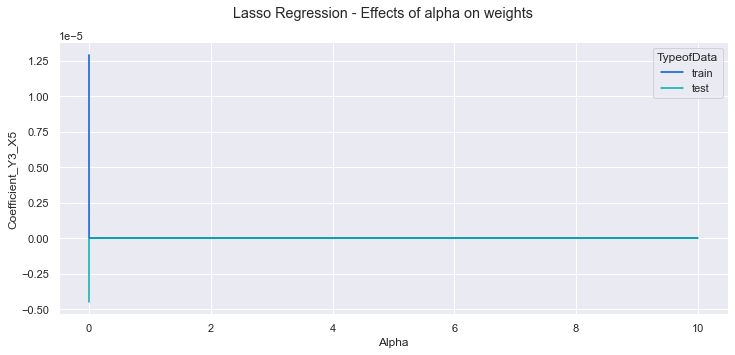

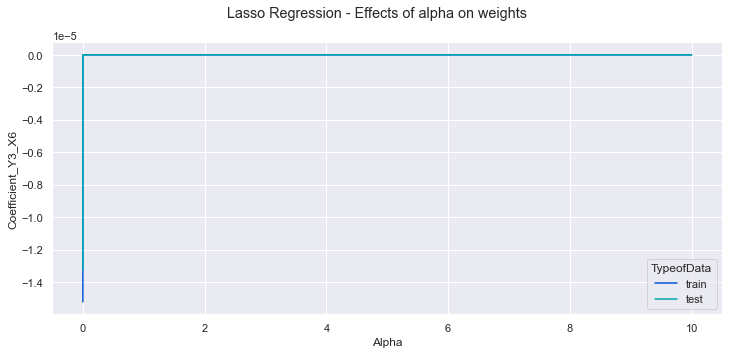

In [127]:
plotWeights('X1','Y3',1)
plotWeights('X2','Y3',1)
plotWeights('X3','Y3',1)
plotWeights('X4','Y3',1)
plotWeights('X5','Y3',1)
plotWeights('X6','Y3',1)

### Observation :  Report on the effect of the regularization term (α) on the value of coefficients and performance of the models - 
We have used set of 6 different alpha values 10,1,0,0.01,0.001,0.00001 and compare the RMSE and RSqaured value for both Ridge and Lasso regression.

#### Ridge : 
1. In case of Ridge regression, as alpha value increases, performance of the model is getting decreased as from the above plot we can see RMSE value is increasing where as RSquared value is rapidly decreasing for both train ans test dataset.<br>
2. Weights are showing different trends for different output, as per the initial analysis we have observed that 
    <br>2.1 for y1 output X1 to X4 feature coefficient is decreasing whereas X5 and X6 increasing for different alpha value.
    <br>2.2 for y2 output X2 to X4 feature coefficient is decreasing whereas X1, X5 increasing. On the other hand for X6 feature we have observed different tendency on train and test dataset one is increasing where as other is decreasing for different alpha value.
    <br>2.3 for y3 output X1 to X4 feature coefficient is decreasing whereas X5 and X6 increasing for different alpha value.
    

#### Lasso : 
1. In case of Lasso regression, as alpha value increases, performance of the model is getting decreased as from the above plot we can see RMSE value is increasing where as RSquared value is rapidly decreasing in approximately same rate for both train and test dataset.<br>
2. Weights are showing different trends for different output, as per the initial analysis we have observed that 
    <br>2.1 for y1 output coefficient value of x1 to x3 is decreasing rapidly towards zero where as for x4, x5, and x6 it remains at zero which signifies those features as insignificant. 
    <br>2.2 for y2 output coefficient value of x1 to x3 is decreasing marginally initially and rapidly there after on increasing alpha value.On the other hand x4, x5, and x6, it remains at zero which signifies those features as insignificant. 
    <br>2.3 for y3 output X1 and X2 slowly decreasing to zero, where as X3 rapidly goes down to zero and x4, x5, and x6, it remains at zero which signifies those features as insignificant.
    
   

###### Q4 Compare both models and elaborate on your findings 

In [128]:
df_analyzer

,Alpha,Type of Regression,TypeofData,RMSE,RMSE_Y1,RMSE_Y2,RMSE_Y3,RSquared,RSquared_Y1,RSquared_Y2,...,Coefficient_Y2_X4,Coefficient_Y2_X5,Coefficient_Y2_X6,Coefficient_Y3,Coefficient_Y3_X1,Coefficient_Y3_X2,Coefficient_Y3_X3,Coefficient_Y3_X4,Coefficient_Y3_X5,Coefficient_Y3_X6
0,10.00000,Ridge,train,1.896905e-01,2.328820e-01,1.859930e-01,1.382751e-01,9.986317e-01,0.998781,0.692932,...,-3.259768e-02,2.067677e-02,-8.976586e-03,"[1.8078523350490219, 2.774820231693781, 0.7590...",1.807852,2.774820,0.759089,-9.029708e-04,4.615712e-02,3.654876e-02
1,10.00000,Lasso,train,5.193784e+00,6.669841e+00,4.587932e+00,3.923044e+00,3.700743e-17,0.000000,-0.000511,...,-0.000000e+00,0.000000e+00,0.000000e+00,"[0.0, 0.0, 0.0, -0.0, 0.0, 0.0]",0.000000,0.000000,0.000000,-0.000000e+00,0.000000e+00,0.000000e+00
2,1.00000,Ridge,train,1.986065e-02,2.432138e-02,1.956291e-02,1.446025e-02,9.999850e-01,0.999987,0.697645,...,-3.673303e-03,2.333127e-03,-1.066253e-03,"[1.8466650793686712, 2.8931615865559865, 0.779...",1.846665,2.893162,0.779438,-8.626638e-05,5.093873e-03,3.979107e-03
3,1.00000,Lasso,train,1.525856e+00,1.548967e+00,1.548968e+00,1.478549e+00,8.966788e-01,0.946067,0.471455,...,-0.000000e+00,0.000000e+00,0.000000e+00,"[1.272853404199878, 1.9829813715261075, 0.0, -...",1.272853,1.982981,0.000000,-0.000000e+00,0.000000e+00,0.000000e+00
4,0.00000,Ridge,train,4.493538e-15,5.765204e-15,3.584232e-15,3.806752e-15,1.000000e+00,1.000000,0.698092,...,-3.339716e-16,-3.086743e-16,-8.991224e-16,"[1.8509833833718055, 2.907134670909726, 0.7817...",1.850983,2.907135,0.781779,-4.126710e-16,-1.225138e-15,-1.970480e-15
5,0.00000,Lasso,train,1.344275e-04,1.678273e-04,1.429334e-04,7.494184e-05,1.000000e+00,1.000000,0.698099,...,-4.781749e-05,2.510816e-05,-2.873352e-05,"[1.851067696069797, 2.907091346269506, 0.78174...",1.851068,2.907091,0.781747,-2.533021e-05,1.291675e-05,-1.523114e-05
6,0.01000,Ridge,train,1.996601e-04,2.444315e-04,1.967733e-04,1.453480e-04,1.000000e+00,1.000000,0.698088,...,-3.723759e-05,2.365548e-05,-1.087130e-05,"[1.850940207533339, 2.9069940630188276, 0.7817...",1.850940,2.906994,0.781755,-8.581617e-07,5.151330e-05,4.017611e-05
7,0.01000,Lasso,train,1.548239e-02,1.547875e-02,1.548167e-02,1.548674e-02,9.999892e-01,0.999995,0.696362,...,-0.000000e+00,0.000000e+00,0.000000e+00,"[1.8456350511839668, 2.8976969735170033, 0.772...",1.845635,2.897697,0.772576,-0.000000e+00,0.000000e+00,0.000000e+00
8,0.00100,Ridge,train,1.996698e-05,2.444427e-05,1.967837e-05,1.453548e-05,1.000000e+00,1.000000,0.698092,...,-3.724223e-06,2.365846e-06,-1.087322e-06,"[1.8509790657958383, 2.9071206093172965, 0.781...",1.850979,2.907121,0.781777,-8.581208e-08,5.151857e-06,4.017964e-06
9,0.00100,Lasso,train,1.544142e-03,1.541826e-03,1.543623e-03,1.546972e-03,9.999999e-01,1.000000,0.697921,...,-0.000000e+00,0.000000e+00,0.000000e+00,"[1.8504562163409009, 2.9061881850825495, 0.780...",1.850456,2.906188,0.780856,-0.000000e+00,0.000000e+00,0.000000e+00


#### RMSE Comparison 

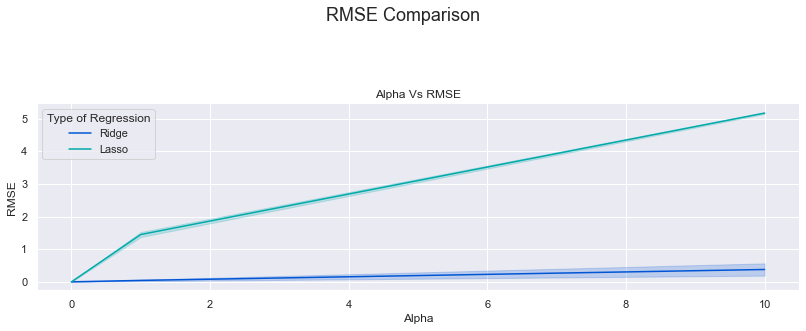

In [148]:
fig,ax = plt.subplots(1,1, figsize=(12,5))
sns.lineplot(x = 'Alpha', y = 'RMSE', hue='Type of Regression', data = df_analyzer,palette = 'winter',legend=True).set(title=f'Alpha Vs RMSE')
sns.despine(fig)      
fig.suptitle('RMSE Comparison', fontsize = 18)
plt.tight_layout(pad = 3)
plt.show()

#### RSquared Comparison 

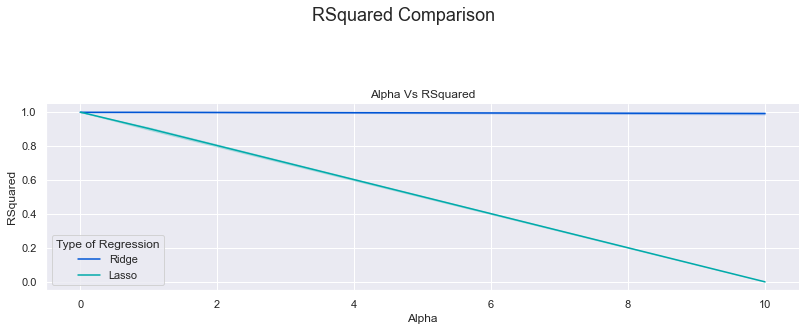

In [150]:
fig,ax = plt.subplots(1,1, figsize=(12,5))
sns.lineplot(x = 'Alpha', y = 'RSquared', hue='Type of Regression', data = df_analyzer,palette = 'winter',legend=True).set(title=f'Alpha Vs RSquared')
sns.despine(fig)      
fig.suptitle('RSquared Comparison', fontsize = 18)
plt.tight_layout(pad = 3)
plt.show()

### Observation : Compare both models and elaborate on your findings -
##### RMSE : 
1. Observing the plot of RMSE for different values of alpha, we can see for alpha is 0 both the model is performing same in terms of RMSE, which is exactly equivalent to linear regression method without regularization.
2. As the alpha values increase, RMSE value for Lasso regression increases drastically, where as for Ridge regression the remain approximately same through out the change in alpha value. So we can say considering this fact Ridge is performing better with higher regularization penalty term.

##### RSquared : 
1. Observing the RSquared plot we can see with increasing value of alpha the RSquared remain also constant for Ridge regression wheres for Lasso RSquared value is dipping down to zero.

### Final Conclusion :
###### Analyzing both RSquared and RMSE we can see that Ridge regression perform relatively better if the alpha value increases.But looking at the weights analysis we can see Lasso is making the insignificant feature coefficient  to zero thats why useful for feature selection. So we can finally said that based on the data set and trade off between performance and feature selection we can choose between Ridge and Lasso regression.
